# Frequency Analysis for South Florida (April 25th - September 15th)

NB: This ipynb complements our blog post published in our [website]()

In order to run this script correctly, run every one of the steps once at a time and wait that the * symbol has turned into a number.

__Authors:__

* Susanna Allés Torrent, [susanna_alles@miami.edu](mailto:susanna_alles@miami.edu), University of Miami
* Dieyun Song, [dxs1138@miami.edu](mailto:dxs1138@miami.edu), University of Miami 
* Jerry Bonnell, [j.bonnell@miami.edu](mailto:j.bonnell@miami.edu), University of Miami



## Setting up

In [172]:
import numpy as np
import pandas as pd
from coveet import count_ngrams, uniq_vocab_by_group
from collections import Counter
from pprint import pprint
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

# April 25 - May 15th

In [2]:
!python3 coveet.py query -g fl -l en es -d 2020-04-25 2020-05-15 

Namespace(all=False, date=[datetime.datetime(2020, 4, 25, 0, 0), datetime.datetime(2020, 5, 15, 0, 0)], func=<function handle_query at 0x7f812a56d550>, geo=['fl'], lang=['en', 'es'], search=None)
wrote df to dhcovid_2020-4-25_2020-5-15_en_es_fl.csv 🎉


In [99]:
df = pd.read_csv('dhcovid_2020-4-25_2020-5-15_en_es_fl.csv', index_col=0)

In [100]:
!python3 coveet.py tidy -file dhcovid_2020-4-25_2020-5-15_en_es_fl.csv -stopwords ../stopwords/stopwords_en.txt ../stopwords/stopwords_es.txt ../stopwords/stopwords_hashtags.txt

Namespace(file='dhcovid_2020-4-25_2020-5-15_en_es_fl.csv', func=<function handle_tidy at 0x7f30a58fe670>, lemmatize=False, search=None, stopwords=['../stopwords/stopwords_en.txt', '../stopwords/stopwords_es.txt', '../stopwords/stopwords_hashtags.txt'])
wrote tidied df to dhcovid_2020-4-25_2020-5-15_en_es_fl_stopworded.csv 🎉


## Top words (04/25-05/15)

In [105]:
df = pd.read_csv('dhcovid_2020-4-25_2020-5-15_en_es_fl_stopworded.csv', index_col=0) # run from here using this file
df['date'] = pd.to_datetime(df['date'])
df['text'] = df['text'].str.split()
df['hashtags'] = df['hashtags'].str.split()
top_n = 100  # top 100 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'text'  # set to either 'text' or 'hashtags'
df = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df.groupby(["geo", "lang"])[col_name]}
# pprint(counts)

In [106]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size

In [107]:
def plot_bar_matrix(counts, num_top_words, num_cols=2, 
                    super_title="figure title", super_font=50):
    """
    function for plotting a matrix of bar plots 
    
    counts: a dictionary mapping from a geo-lang pair identifier (generalizable to any identifier)
            to a list of (word, count) tuples containing the top word frequencies
    num_cols: desired number of columns to show in the grid
    str_func: function for "pretty printing" the title used in each of the bar charts  
    """
    # automatically determine the grid to use based on desired number of columns 
    num_rows = len(counts.keys()) // num_cols
    num_rows += 1 if num_rows * num_cols < len(counts.keys()) else 0
    fig, axes = plt.subplots(num_rows, num_cols)
    flattened = axes.flatten()
    for i, (id_pair, counts) in enumerate(counts.items()):
        labels = [" ".join(w) for w, _ in counts]
        y = [n for _, n in counts]
        cmap = plt.get_cmap('spring')
        colors = plt.get_cmap('spring')(np.linspace(0, 1, len(labels)))
        flattened[i].set_title(f"{' '.join([str(p) for p in id_pair])}")
        flattened[i].barh(y=range(0, num_top_words), width=y, color=colors, tick_label=labels) # range should equal to the # of top words you want to retrieve.
        flattened[i].invert_yaxis()  # reverse the visualization order along the y-axis
    fig.suptitle(super_title, fontsize=50)

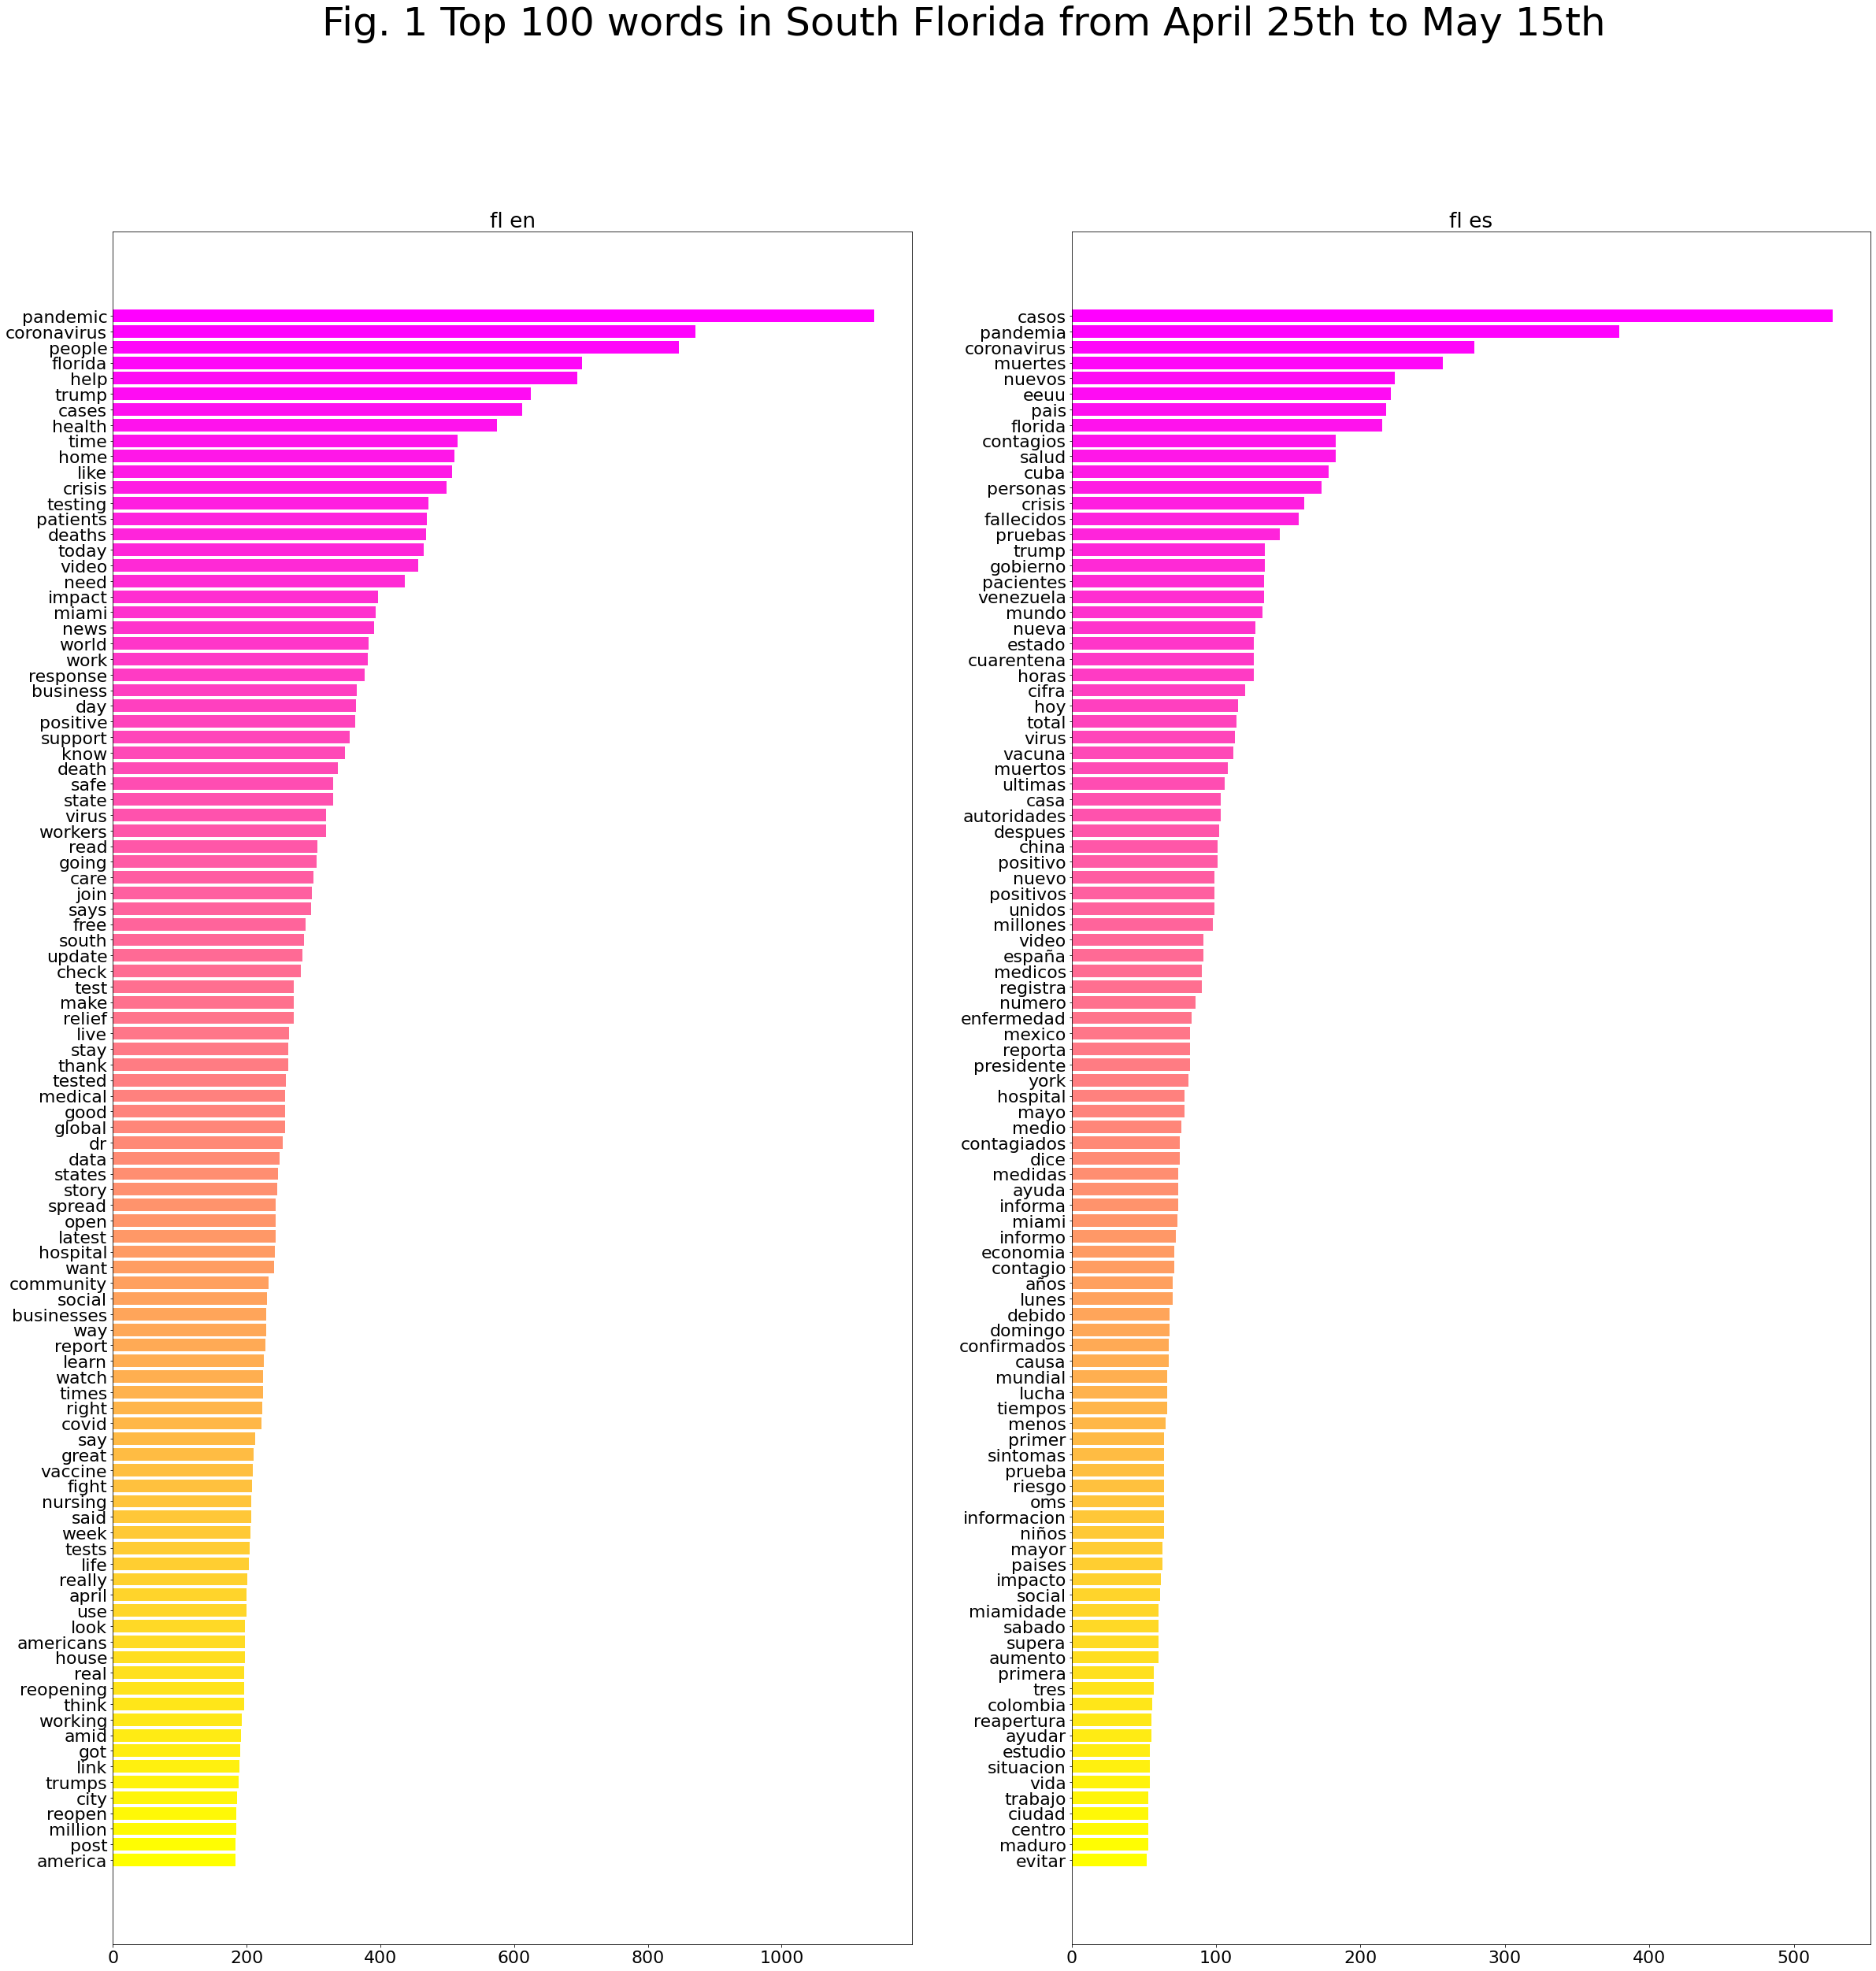

In [108]:
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2, 
               super_title = 'Fig. 1 Top 100 words in South Florida from April 25th to May 15th', super_font = 50)

## Top 50 hashtags (04/25-05/15)

In [109]:
top_n = 50  # top 30 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'hashtags'  # set to either 'text' or 'hashtags'
df_text = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df_text.groupby(["geo", "lang"])[col_name]}
#pprint(counts)

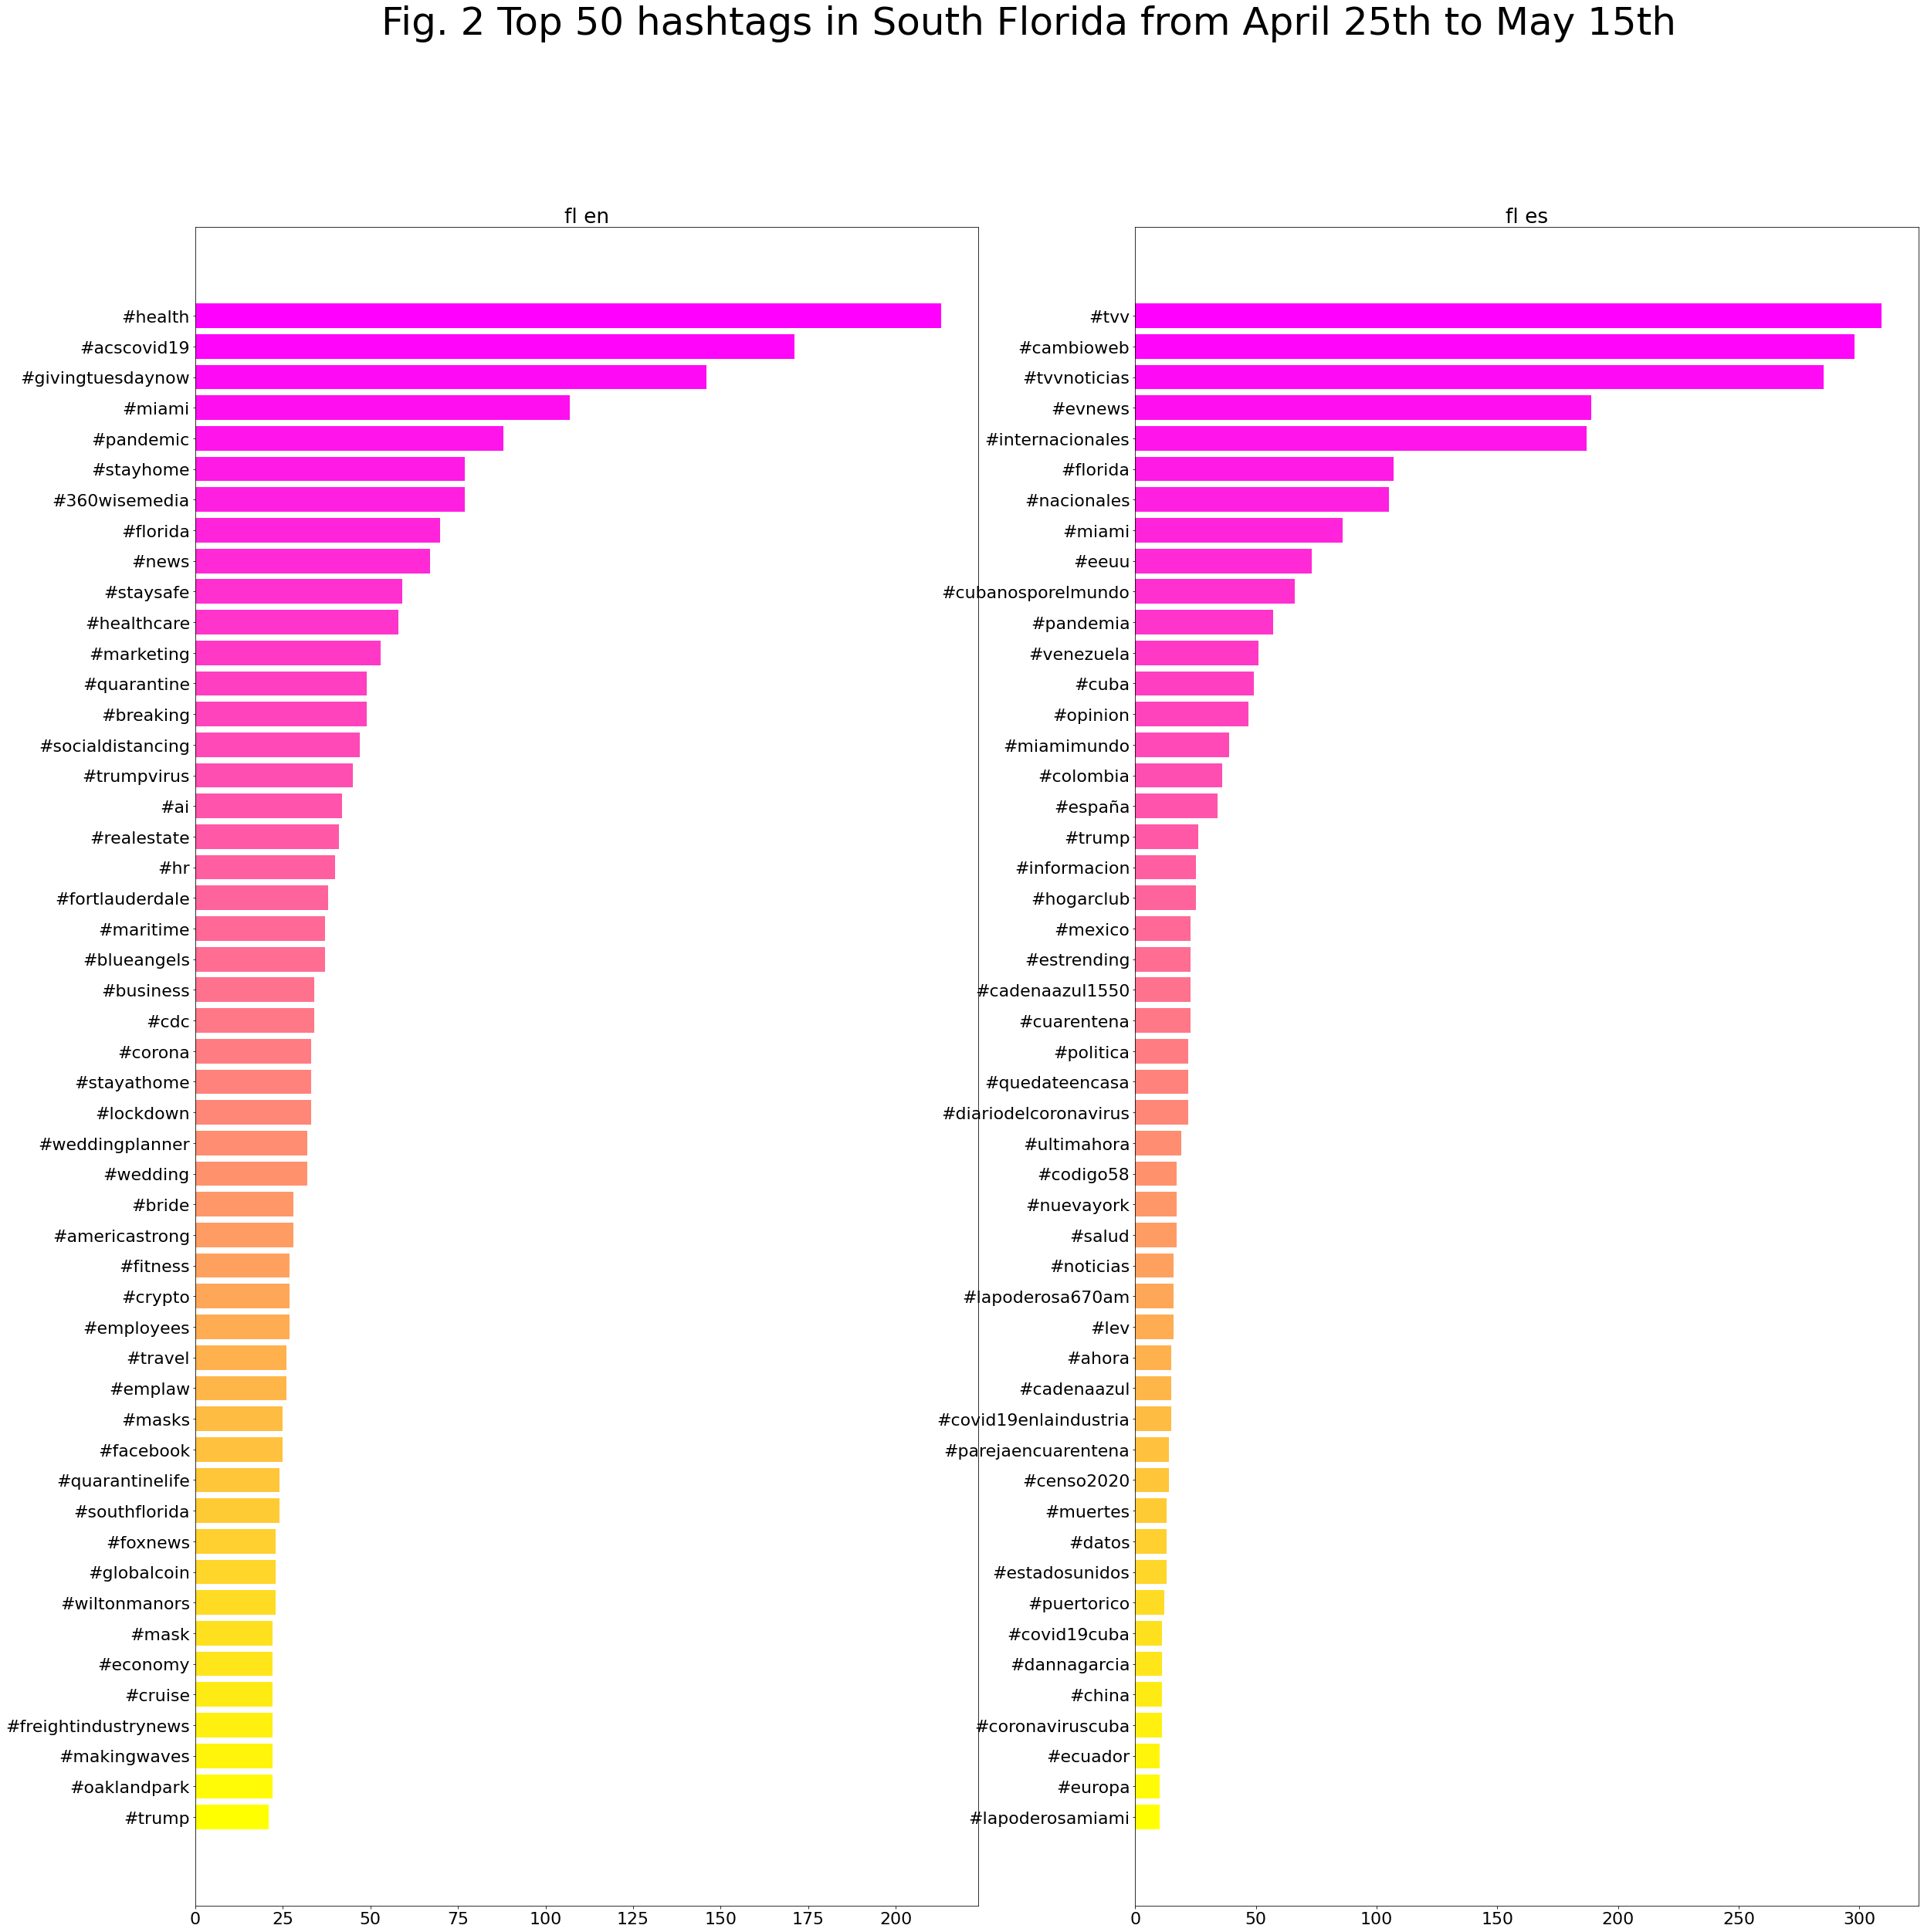

In [110]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2,
               super_title = 'Fig. 2 Top 50 hashtags in South Florida from April 25th to May 15th', super_font = 50)

## Unique 50 hashtags (04/25-05/15)

In [111]:
col_name = "hashtags"
df = df.dropna(subset=[col_name])
grouping = df.groupby(["geo", "lang"])[col_name]
vocab_dic = uniq_vocab_by_group(grouping)  # unique vocab dictionary 
df[col_name] = df.apply(lambda x : set(x[col_name]) & vocab_dic[(x['geo'], x['lang'])],
                        result_type='reduce', axis=1)  # filtering tweets by that dic
counts = {k: Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n) for k, t in grouping}
#pprint(counts)

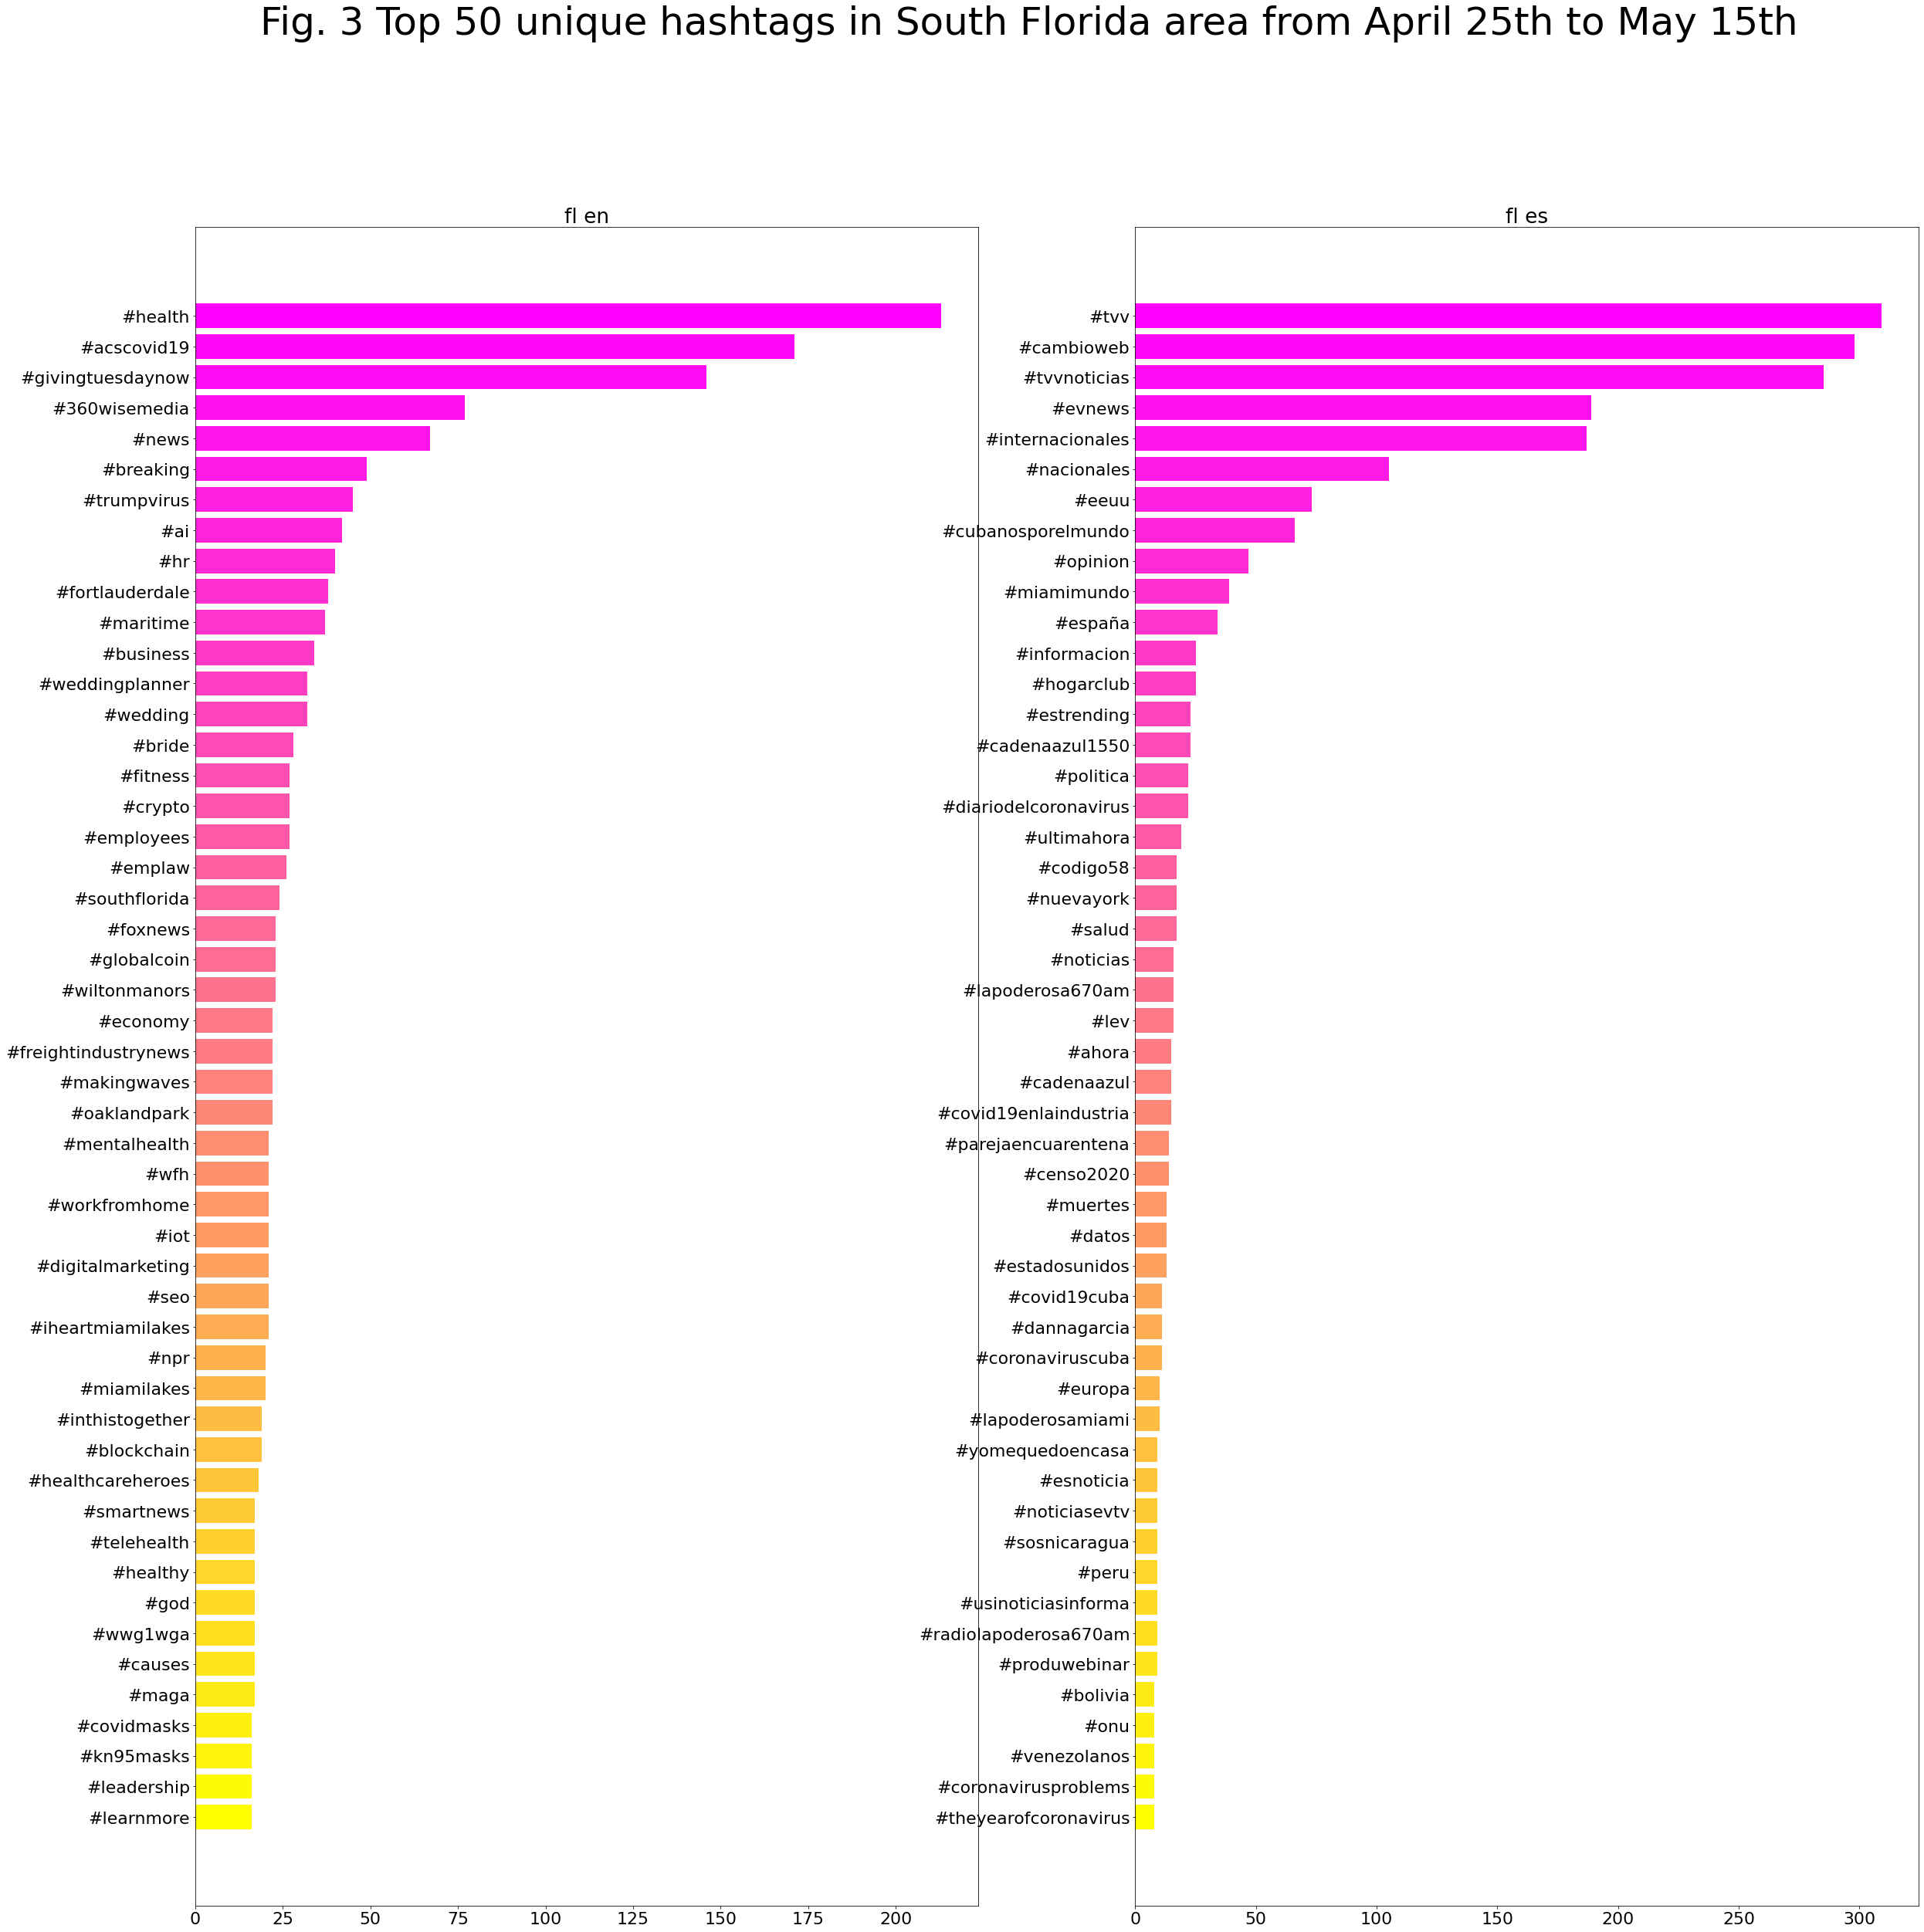

In [112]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2,
               super_title = 'Fig. 3 Top 50 unique hashtags in South Florida area from April 25th to May 15th', super_font = 50)

# May 15th - June 15th

In [113]:
!python3 coveet.py query -g fl -l en es -d 2020-05-15 2020-06-15

Namespace(all=False, date=[datetime.datetime(2020, 5, 15, 0, 0), datetime.datetime(2020, 6, 15, 0, 0)], func=<function handle_query at 0x7fb81d6ea550>, geo=['fl'], lang=['en', 'es'], search=None)
wrote df to dhcovid_2020-5-15_2020-6-15_en_es_fl.csv 🎉


In [114]:
df = pd.read_csv('dhcovid_2020-5-15_2020-6-15_en_es_fl.csv', index_col=0)

In [115]:
!python3 coveet.py tidy -file dhcovid_2020-5-15_2020-6-15_en_es_fl.csv -stopwords ../stopwords/stopwords_es.txt ../stopwords/stopwords_en.txt ../stopwords/stopwords_hashtags.txt

Namespace(file='dhcovid_2020-5-15_2020-6-15_en_es_fl.csv', func=<function handle_tidy at 0x7fdb34e6c670>, lemmatize=False, search=None, stopwords=['../stopwords/stopwords_es.txt', '../stopwords/stopwords_en.txt', '../stopwords/stopwords_hashtags.txt'])
wrote tidied df to dhcovid_2020-5-15_2020-6-15_en_es_fl_stopworded.csv 🎉


## Top words (05/15-06/15)

In [116]:
df = pd.read_csv('dhcovid_2020-5-15_2020-6-15_en_es_fl_stopworded.csv', index_col=0) # run from here using this file
df['date'] = pd.to_datetime(df['date'])
df['text'] = df['text'].str.split()
df['hashtags'] = df['hashtags'].str.split()
top_n = 100  # top 10 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'text'  # set to either 'text' or 'hashtags'
df_text = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df_text.groupby(["geo", "lang"])[col_name]}
#pprint(counts)

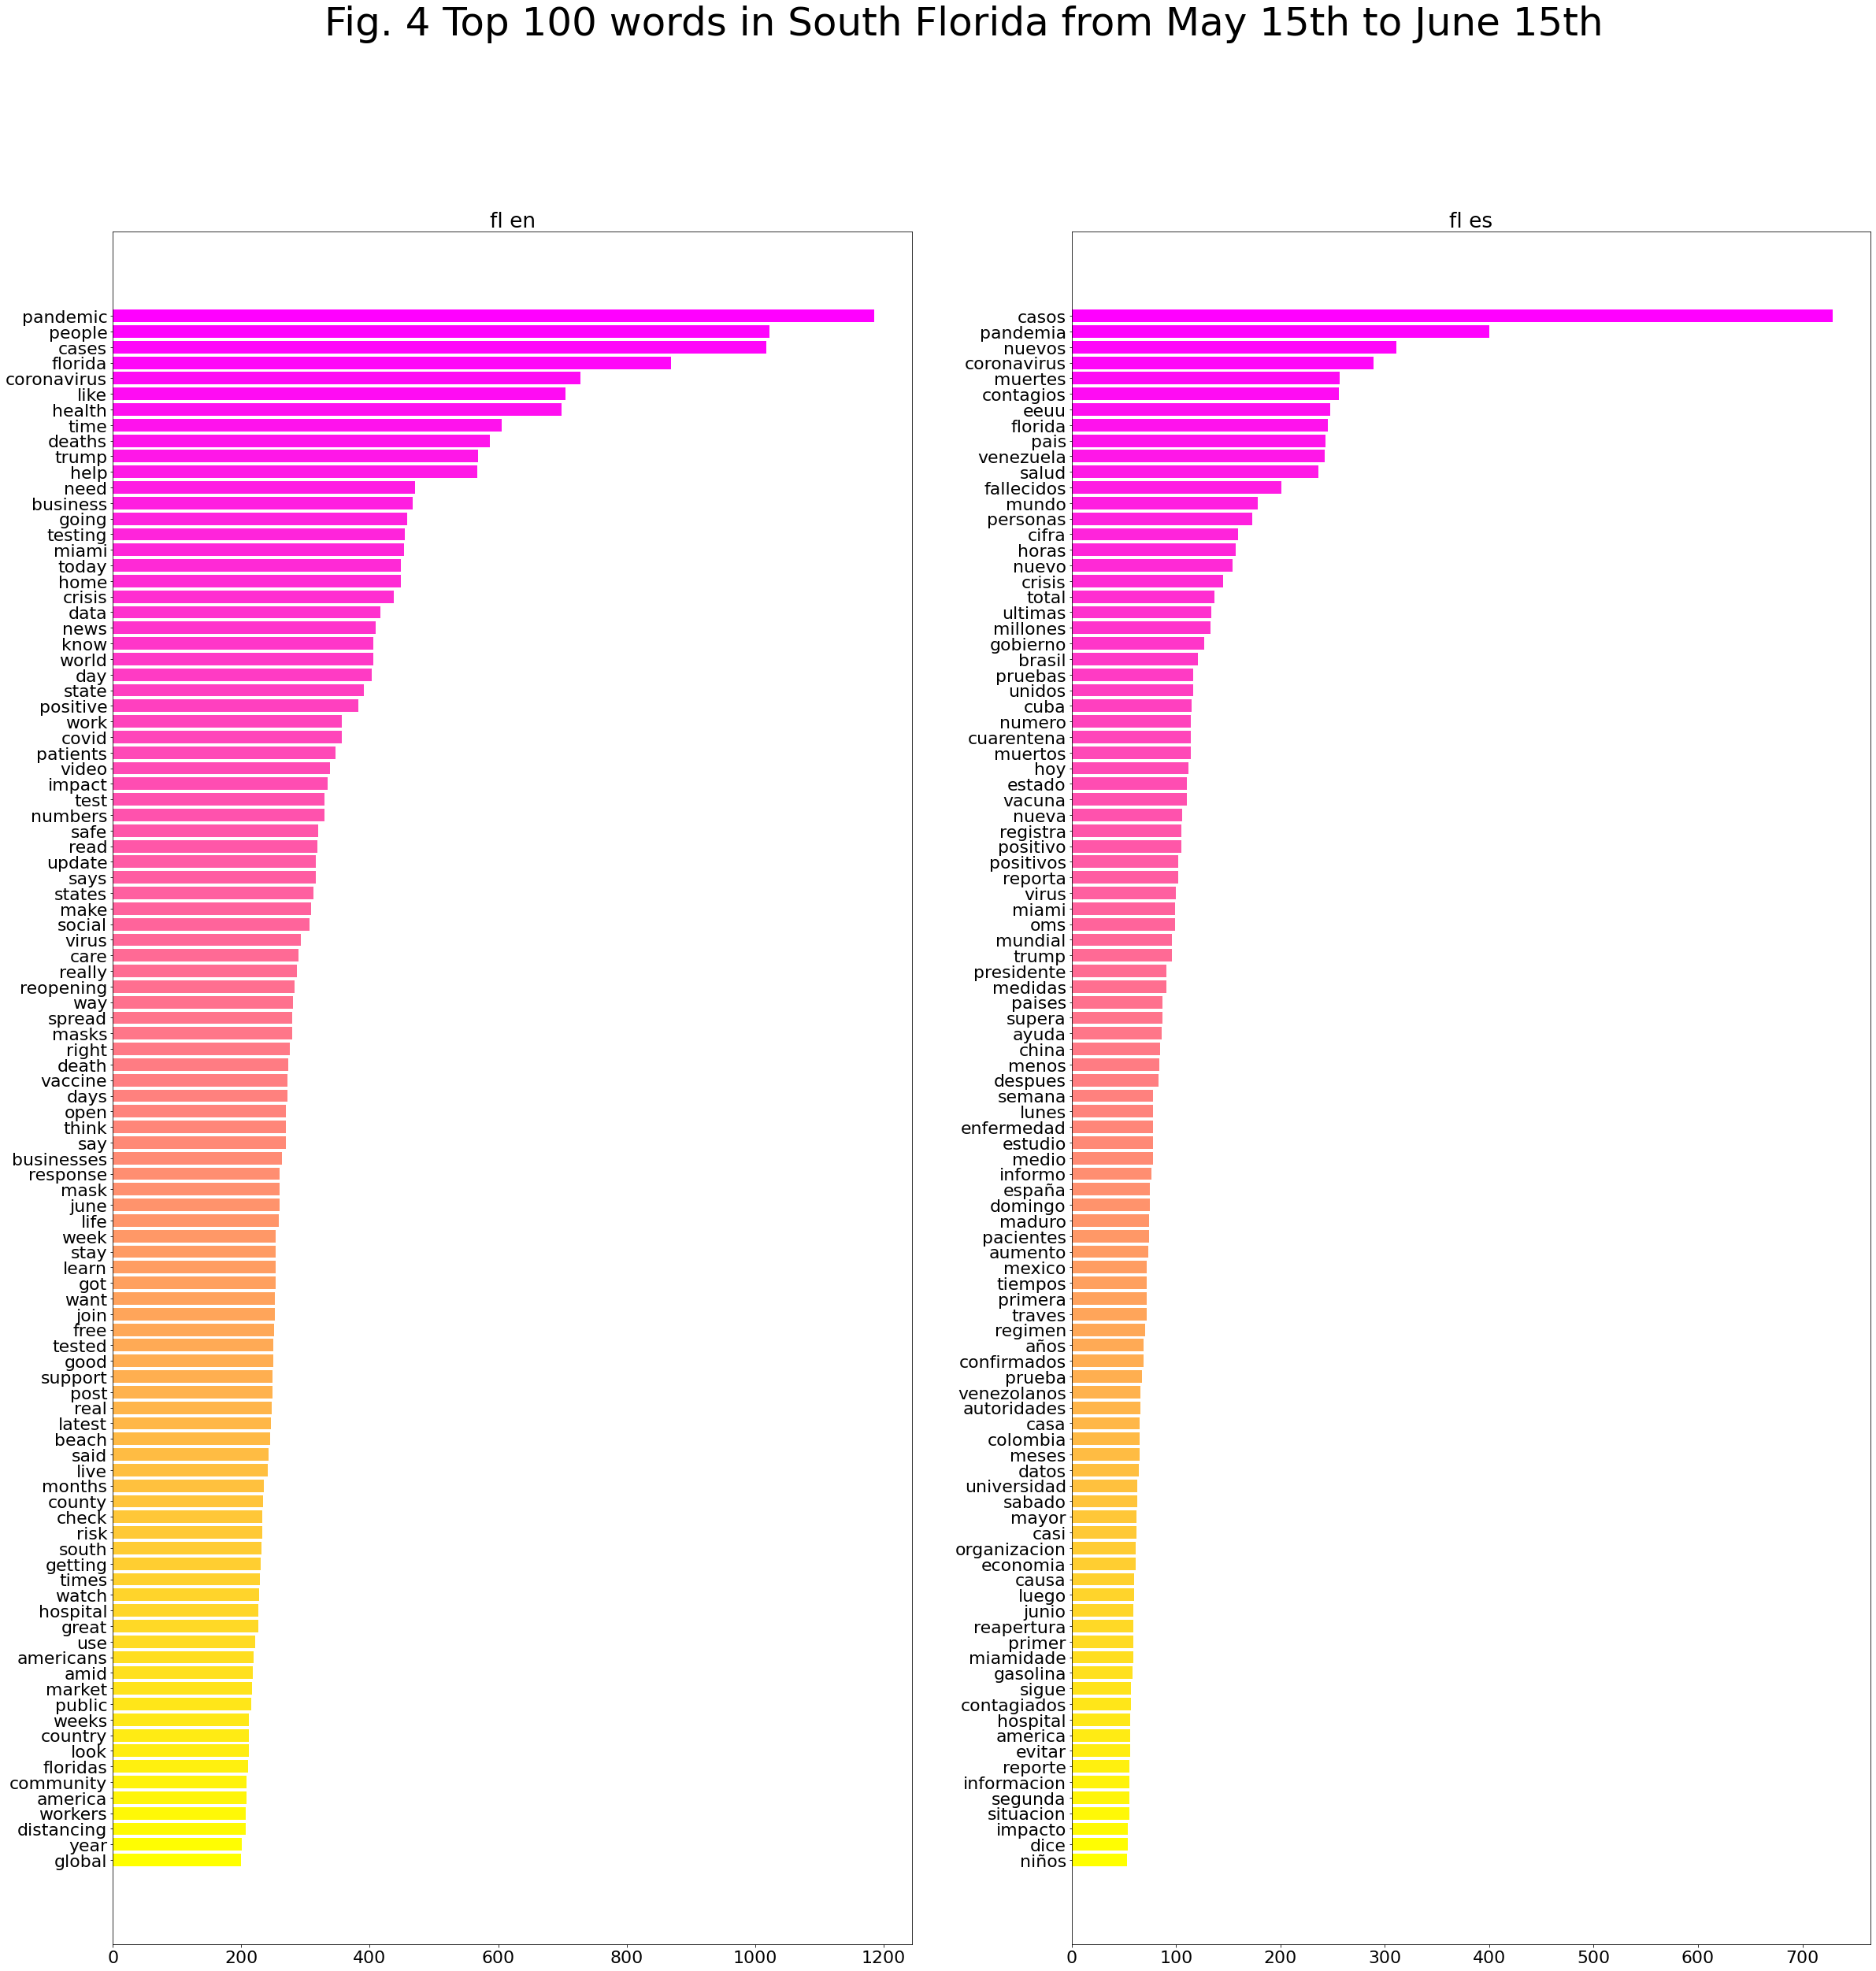

In [117]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2,
               super_title = 'Fig. 4 Top 100 words in South Florida from May 15th to June 15th', super_font = 50)

## Top 50 hashtags (05/15-06/15)

In [118]:
top_n = 50  # top 50 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'hashtags'  # set to either 'text' or 'hashtags'
df_text = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df_text.groupby(["geo", "lang"])[col_name]}
#pprint(counts)

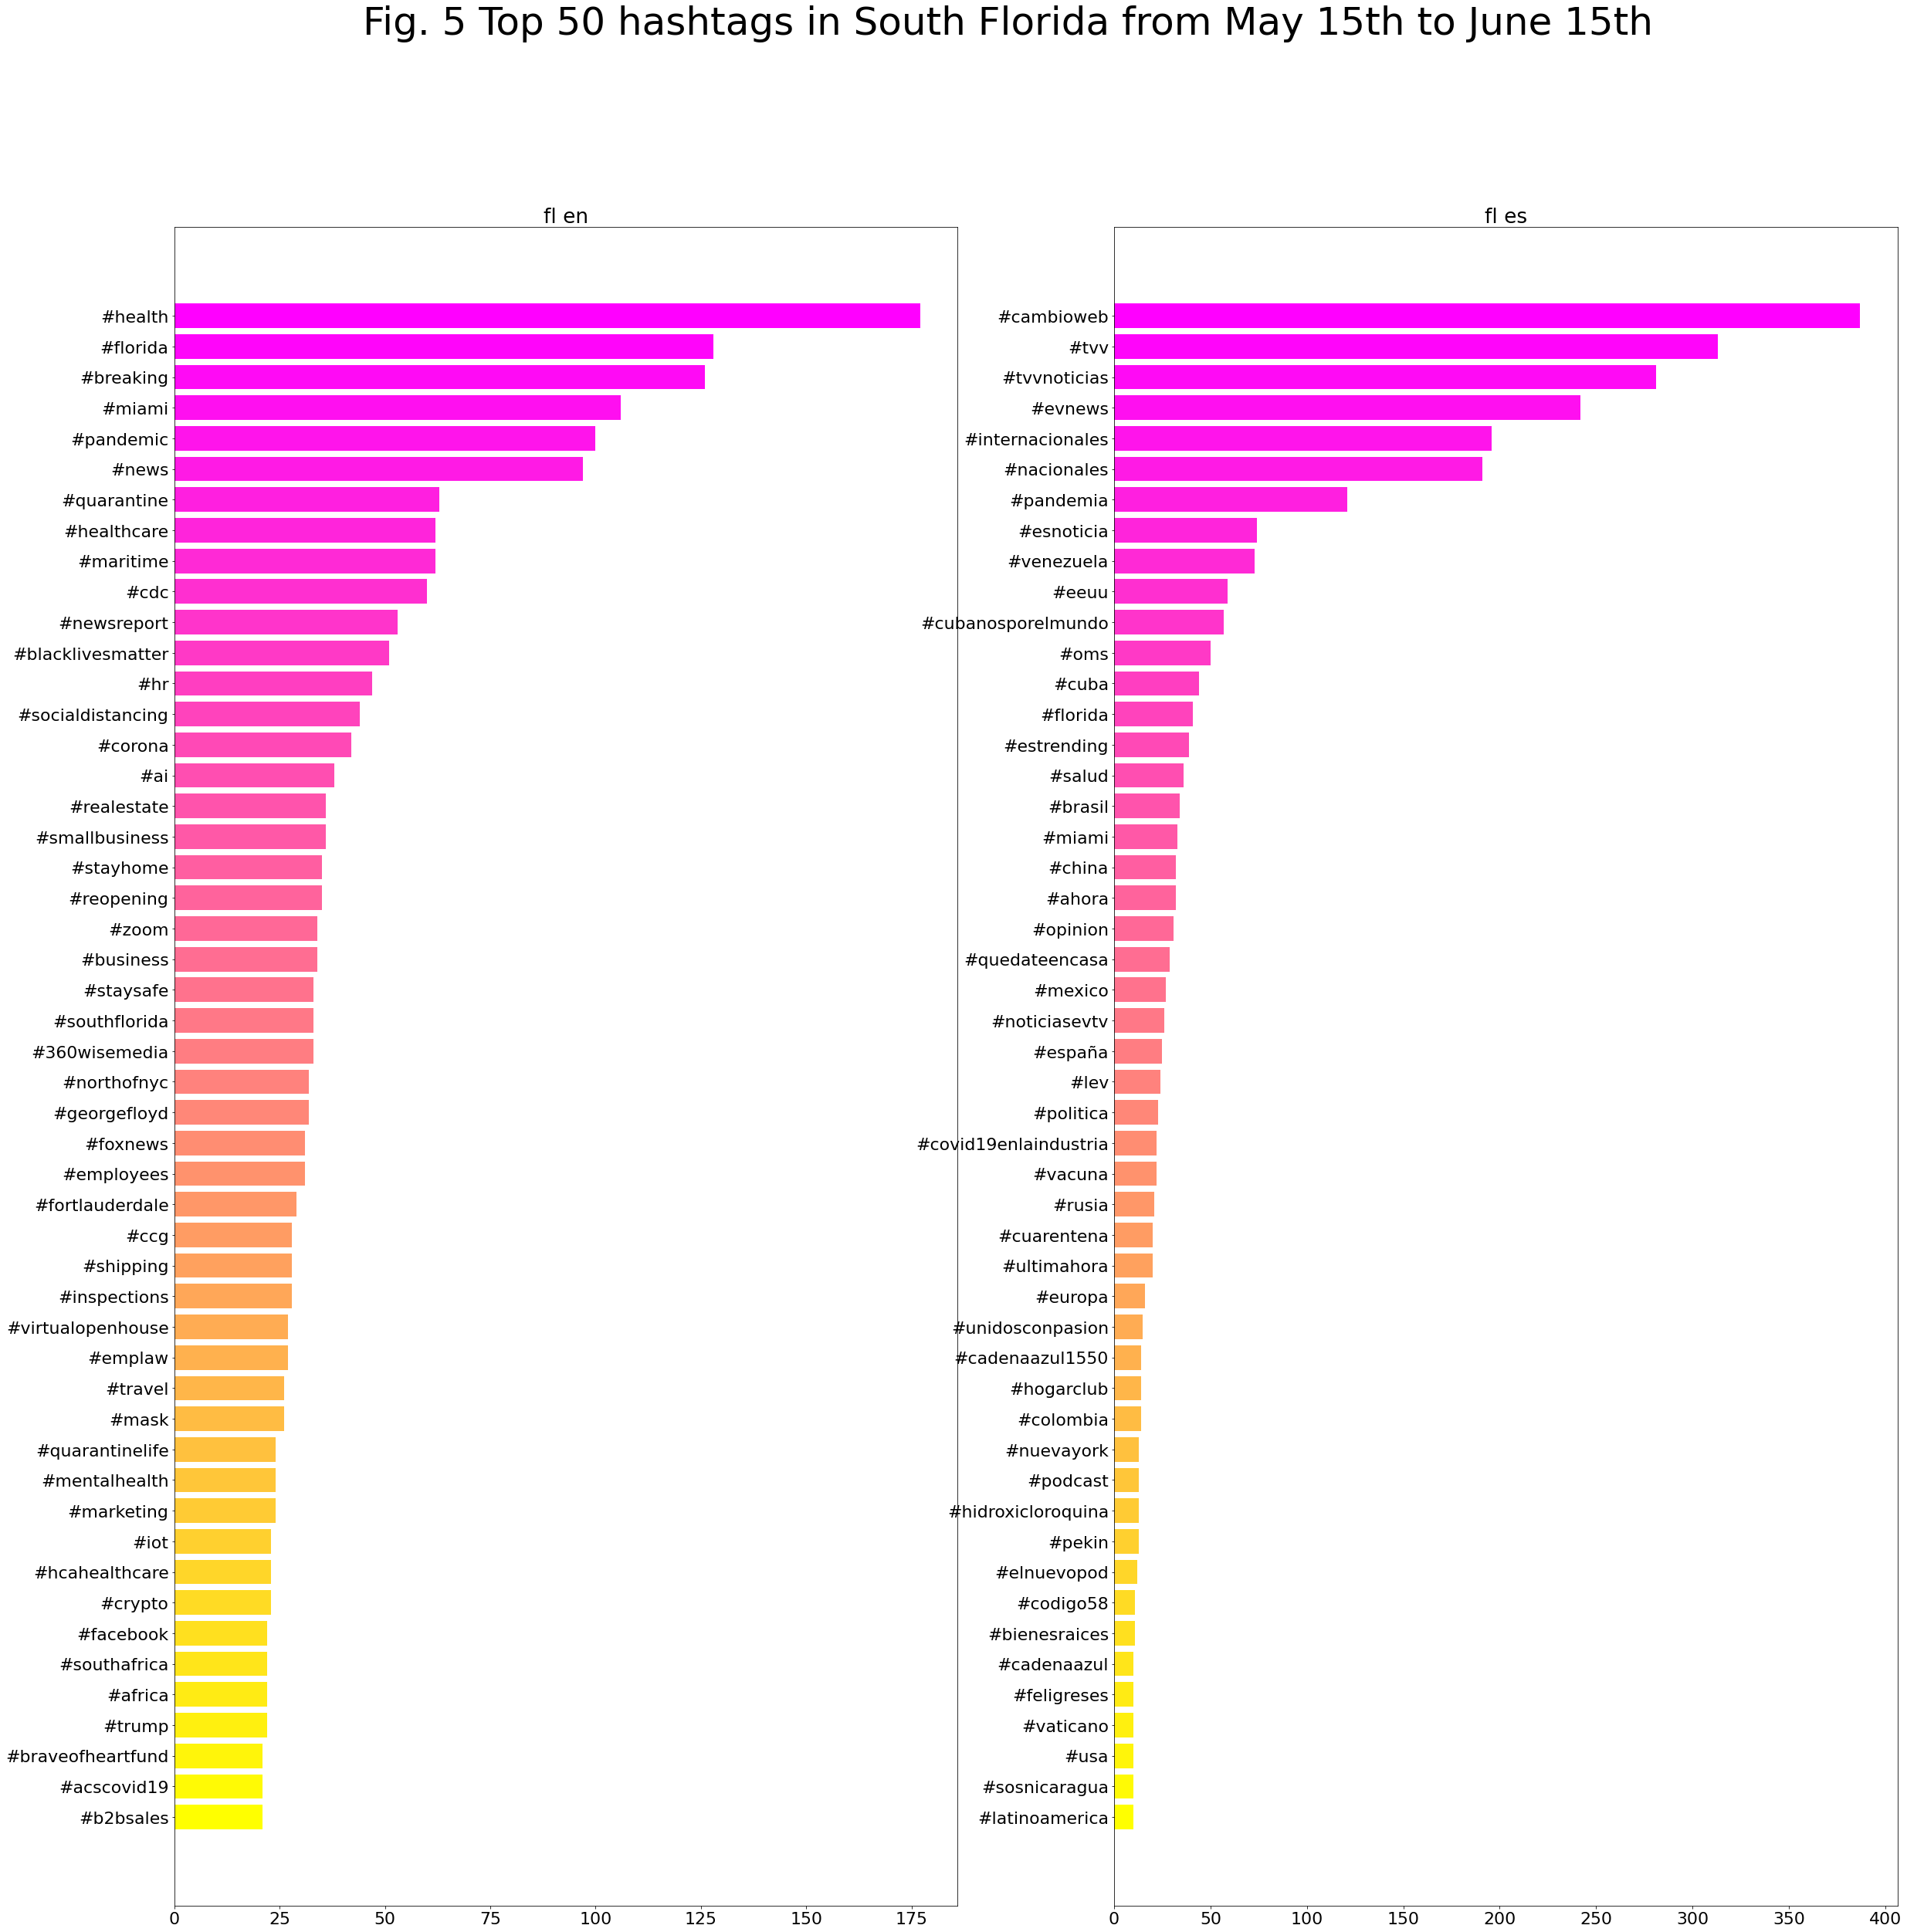

In [119]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2,
               super_title = 'Fig. 5 Top 50 hashtags in South Florida from May 15th to June 15th', super_font = 50)

## Unique 50 hashtags (05/15-06/15)

In [120]:
col_name = "hashtags"
df = df.dropna(subset=[col_name])
grouping = df.groupby(["geo", "lang"])[col_name]
vocab_dic = uniq_vocab_by_group(grouping)  # unique vocab dictionary 
df[col_name] = df.apply(lambda x : set(x[col_name]) & vocab_dic[(x['geo'], x['lang'])],
                        result_type='reduce', axis=1)  # filtering tweets by that dic
counts = {k: Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n) for k, t in grouping}
#pprint(counts)

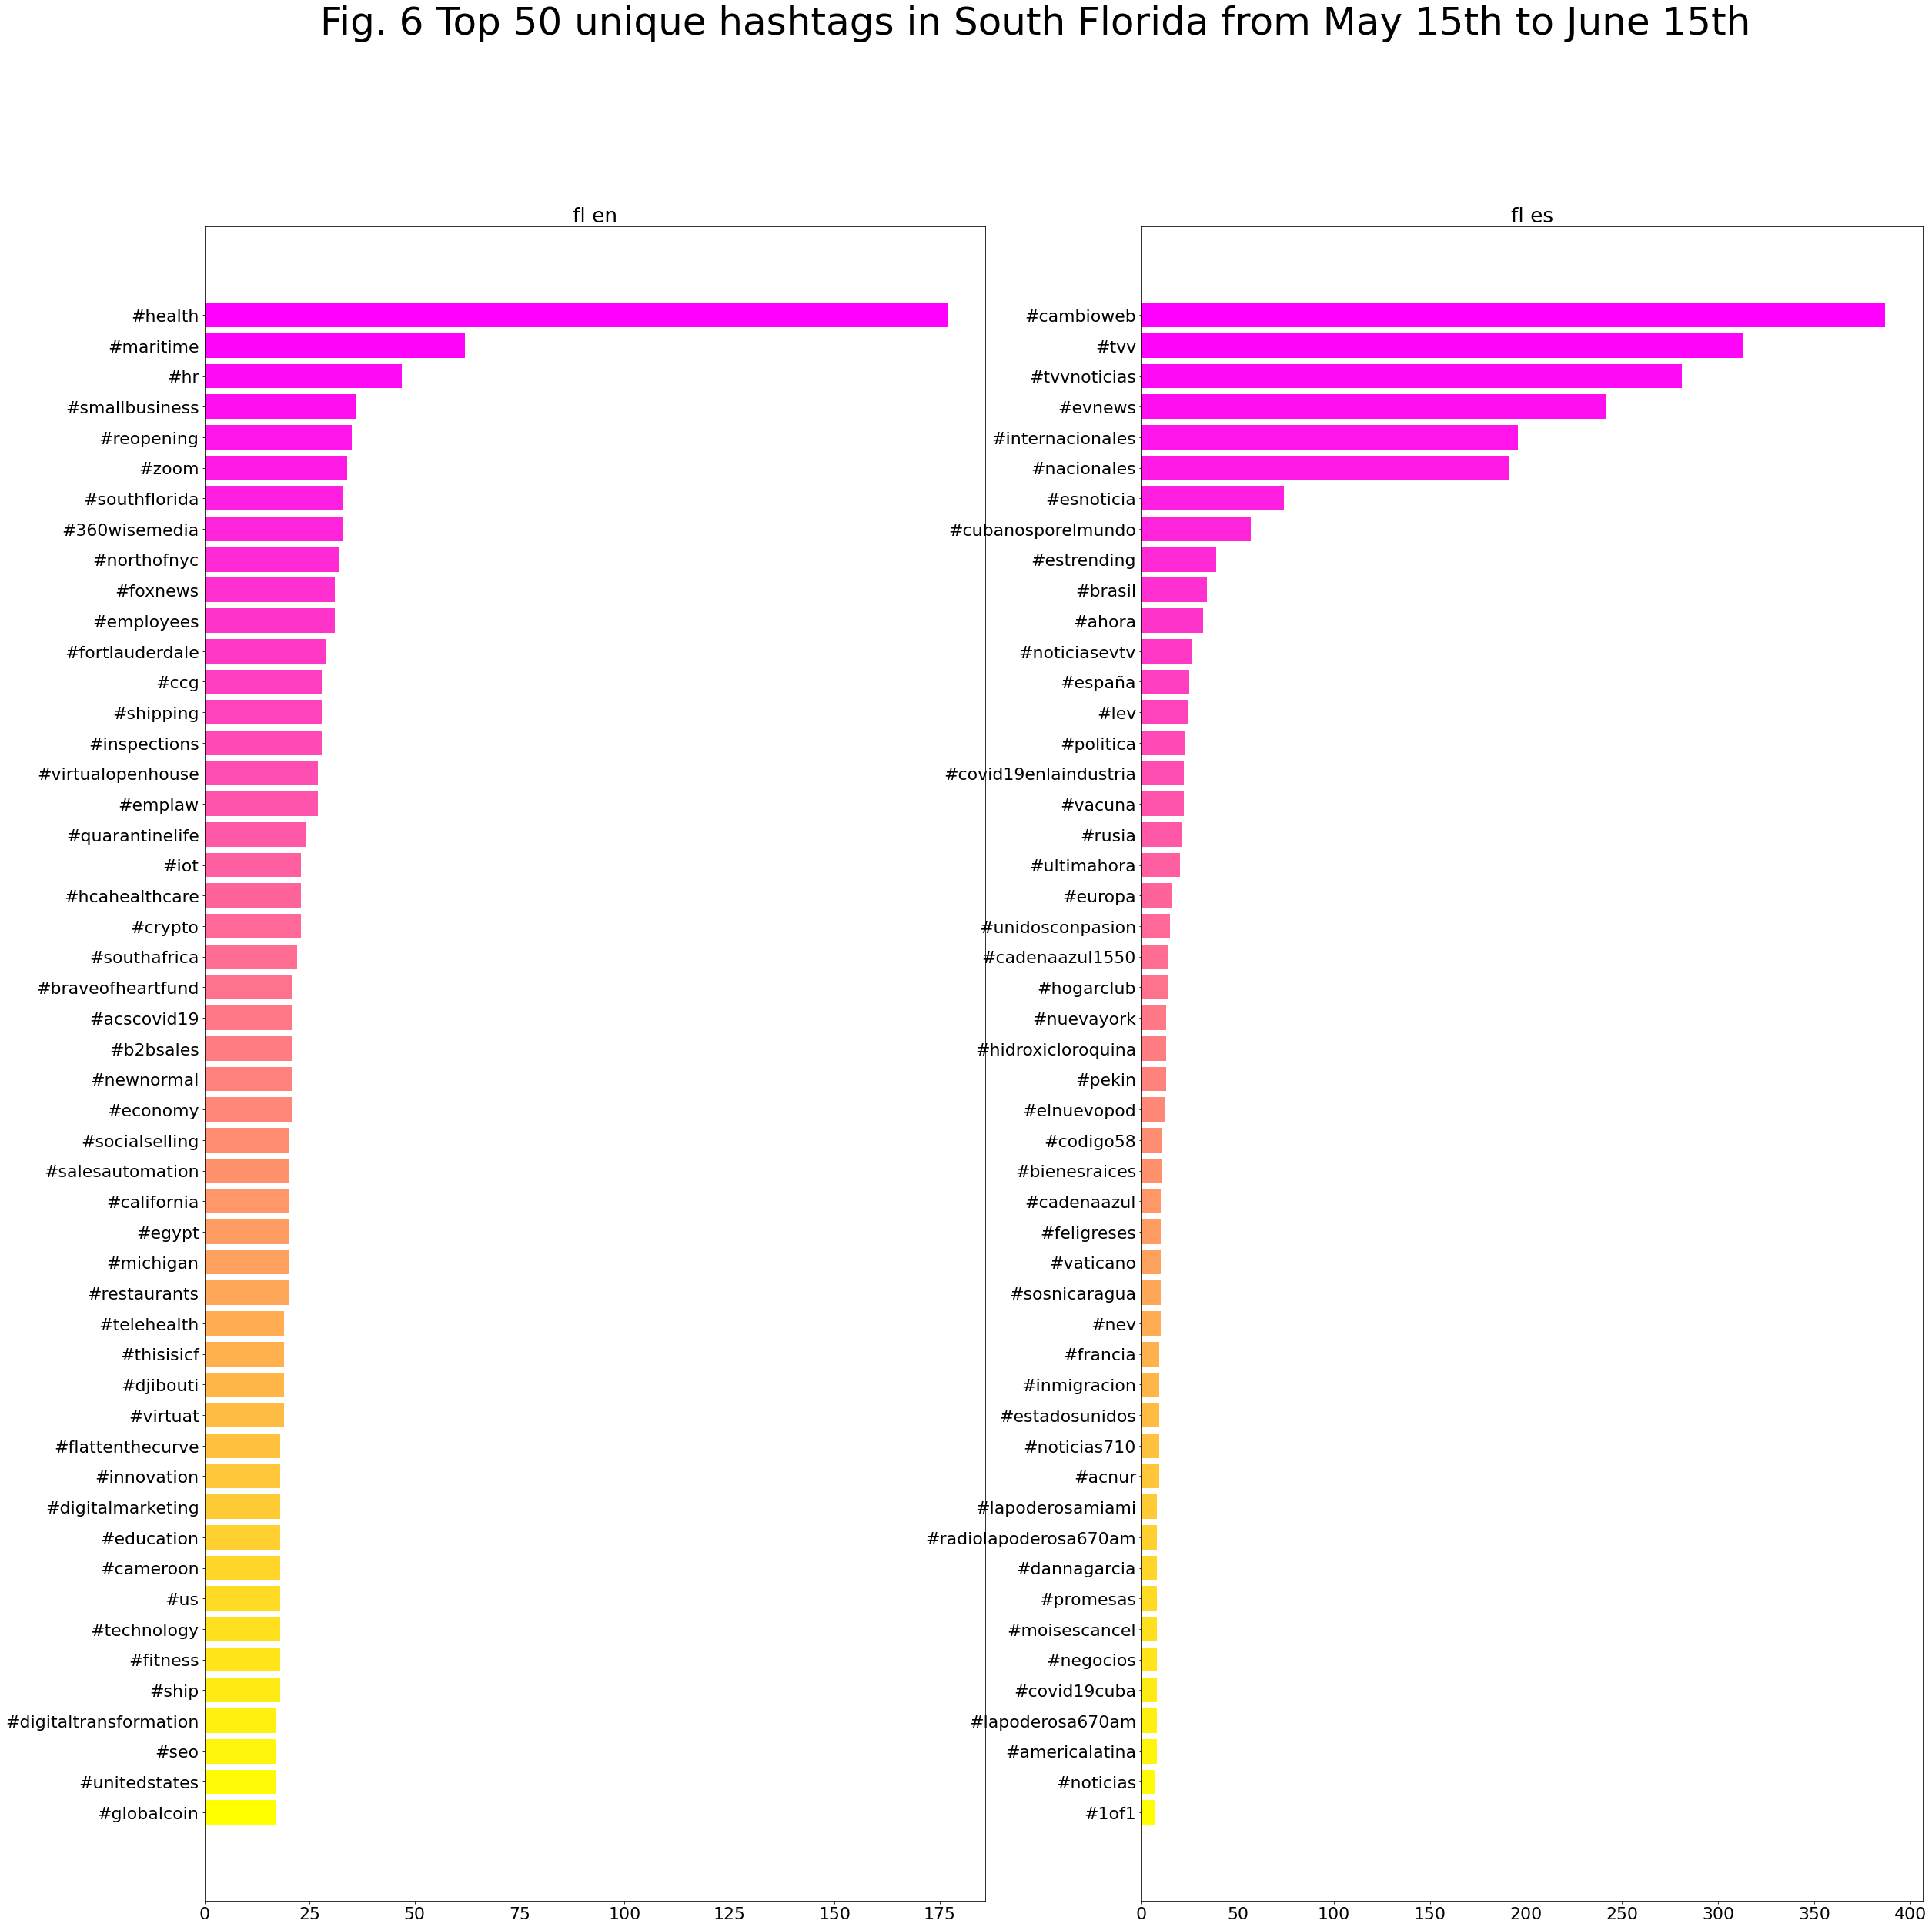

In [121]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2,
               super_title = 'Fig. 6 Top 50 unique hashtags in South Florida from May 15th to June 15th', super_font = 50)

# June 15th - July 15th

In [142]:
!python3 coveet.py query -g fl -l en es -d 2020-06-15 2020-07-15 

Namespace(all=False, date=[datetime.datetime(2020, 6, 15, 0, 0), datetime.datetime(2020, 7, 15, 0, 0)], func=<function handle_query at 0x7f395dd9e550>, geo=['fl'], lang=['en', 'es'], search=None)
wrote df to dhcovid_2020-6-15_2020-7-15_en_es_fl.csv 🎉


In [202]:
df = pd.read_csv('dhcovid_2020-6-15_2020-7-15_en_es_fl.csv', index_col=0)

In [203]:
!python3 coveet.py tidy -file dhcovid_2020-6-15_2020-7-15_en_es_fl.csv -stopwords ../stopwords/stopwords_en.txt ../stopwords/stopwords_es.txt ../stopwords/stopwords_hashtags.txt

Namespace(file='dhcovid_2020-6-15_2020-7-15_en_es_fl.csv', func=<function handle_tidy at 0x7fbd22b32670>, lemmatize=False, search=None, stopwords=['../stopwords/stopwords_en.txt', '../stopwords/stopwords_es.txt', '../stopwords/stopwords_hashtags.txt'])
wrote tidied df to dhcovid_2020-6-15_2020-7-15_en_es_fl_stopworded.csv 🎉


## Top 100 words (06/15-07/15)

In [204]:
df = pd.read_csv('dhcovid_2020-6-15_2020-7-15_en_es_fl_stopworded.csv', index_col=0) # run from here using this file
df['date'] = pd.to_datetime(df['date'])
df['text'] = df['text'].str.split()
df['hashtags'] = df['hashtags'].str.split()
top_n = 100  # top 100 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'text'  # set to either 'text' or 'hashtags'
df = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df.groupby(["geo", "lang"])[col_name]}
# pprint(counts)

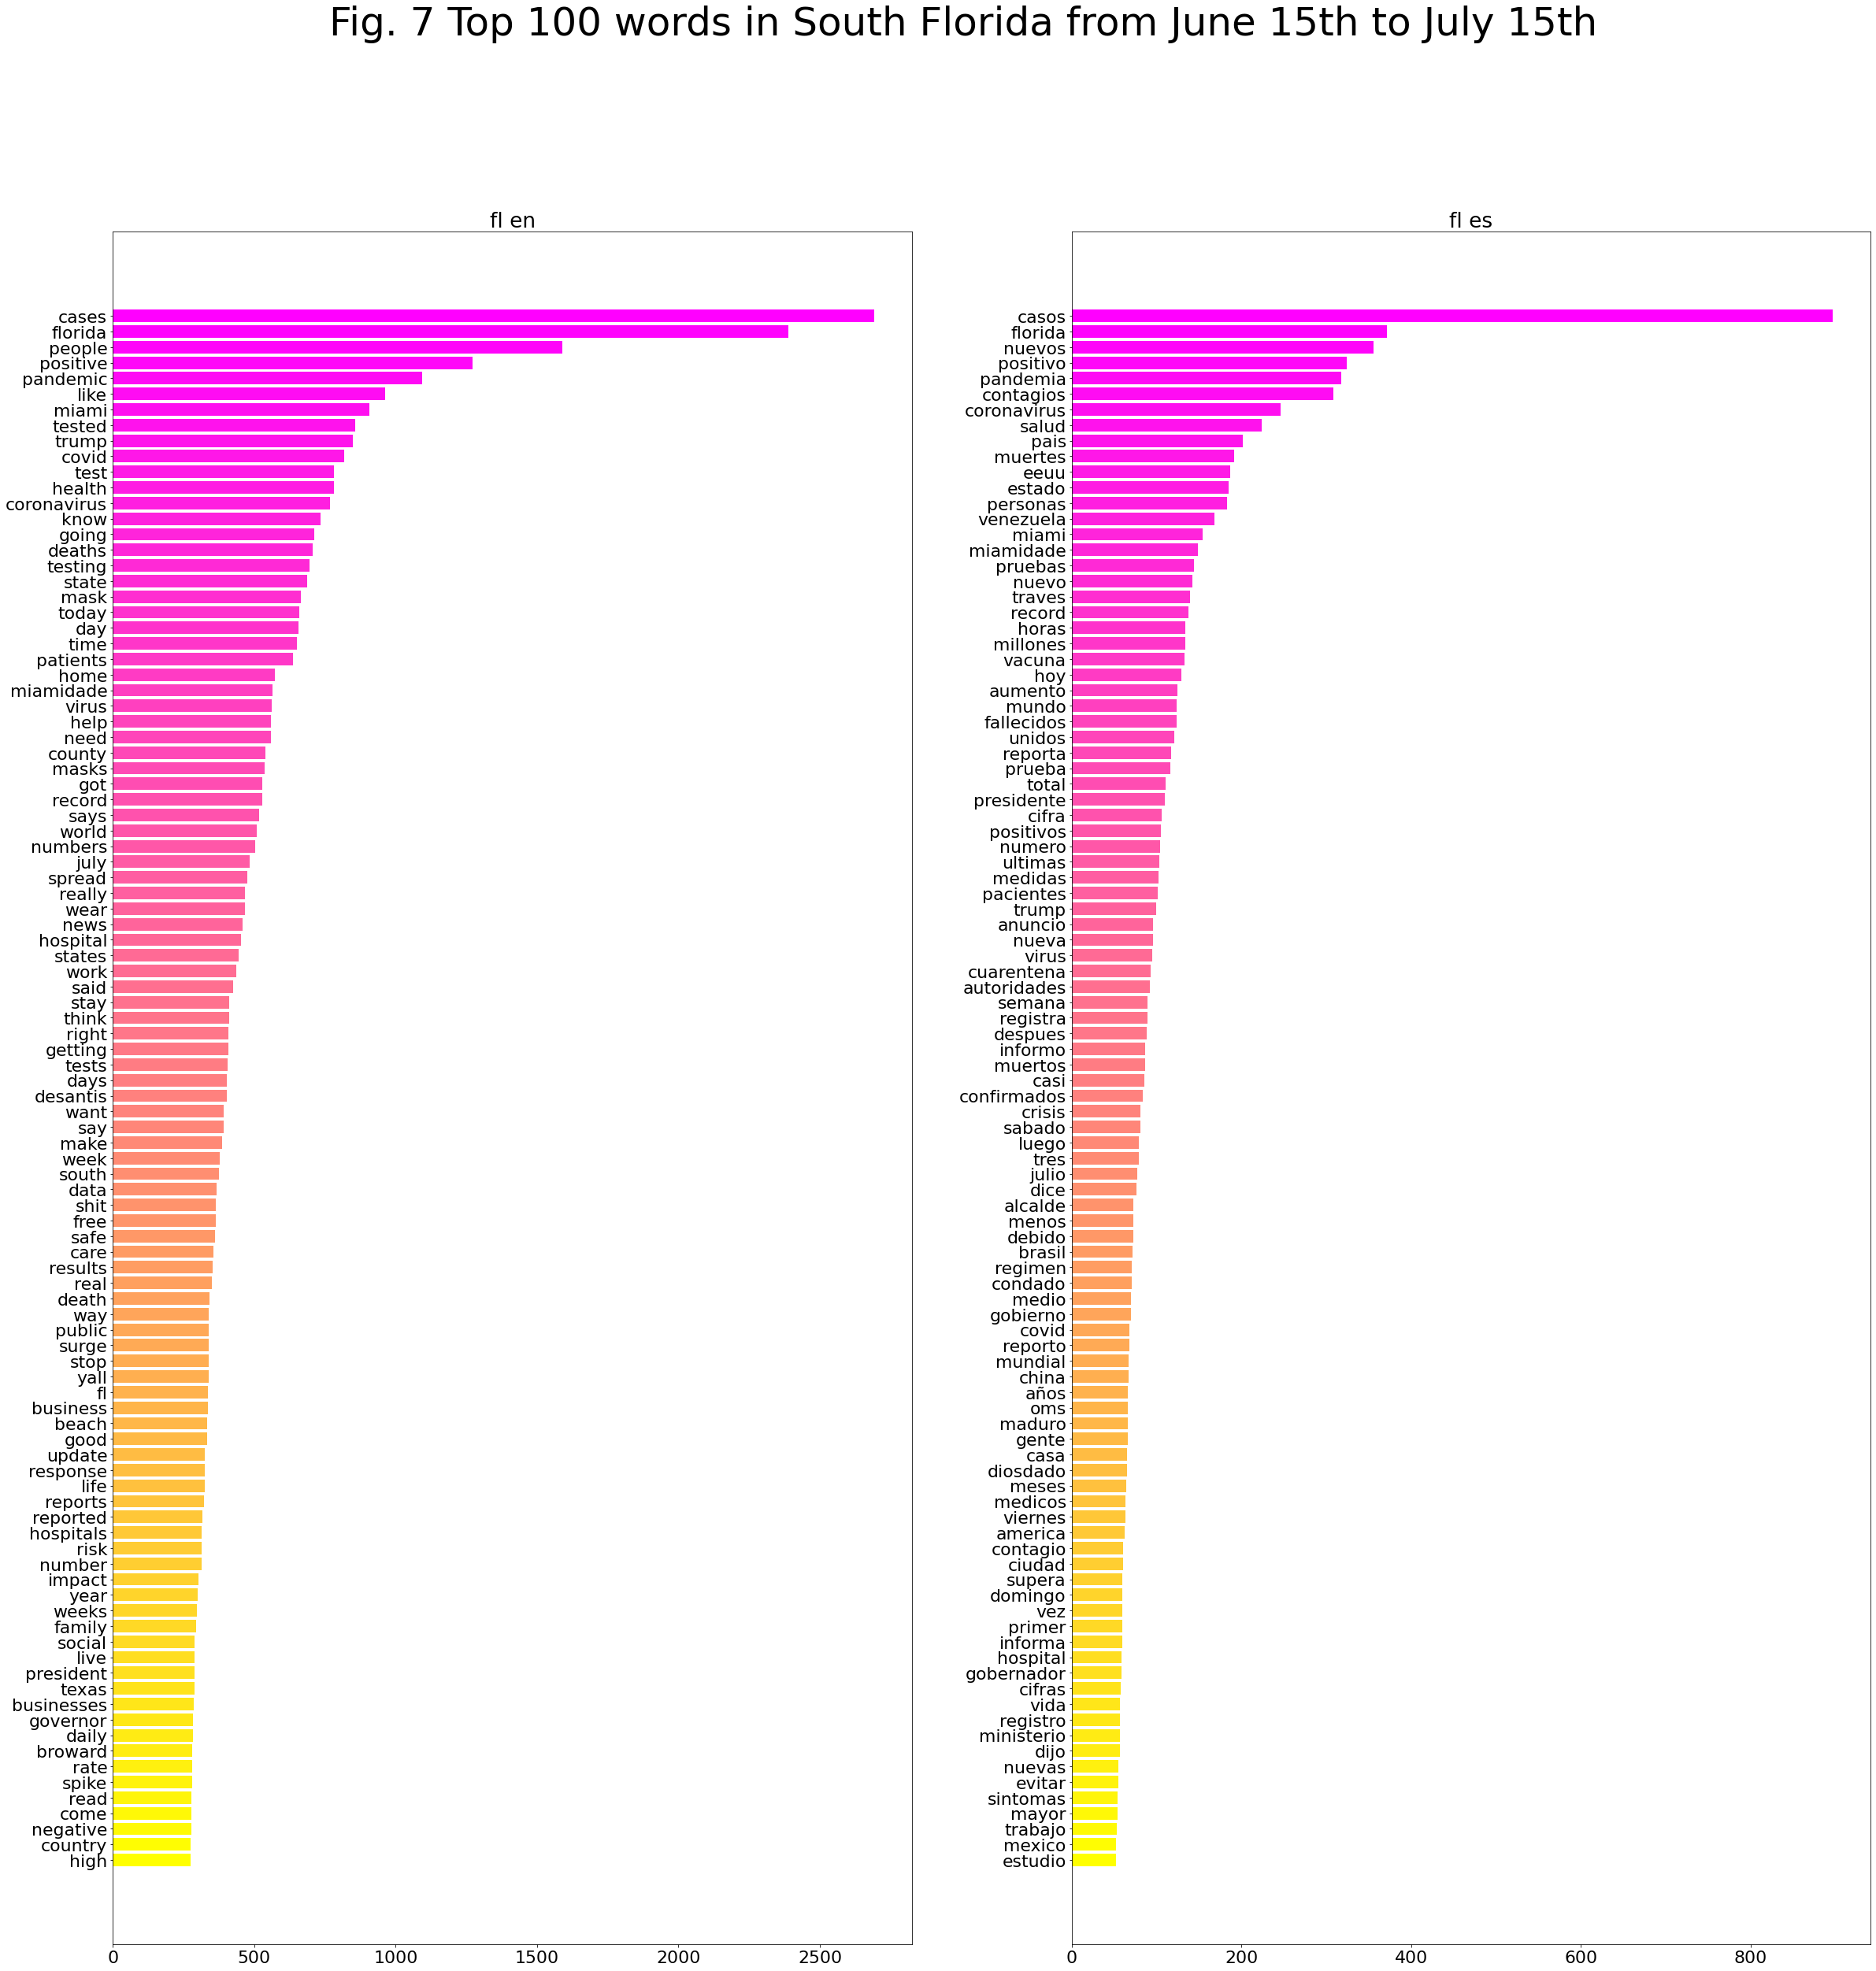

In [205]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2, 
               super_title = 'Fig. 7 Top 100 words in South Florida from June 15th to July 15th', super_font = 50)

## Top 50 hashtags (06/15-07/15)

In [206]:
top_n = 50  # top 50 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'hashtags'  # set to either 'text' or 'hashtags'
df_text = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df_text.groupby(["geo", "lang"])[col_name]}
#pprint(counts)

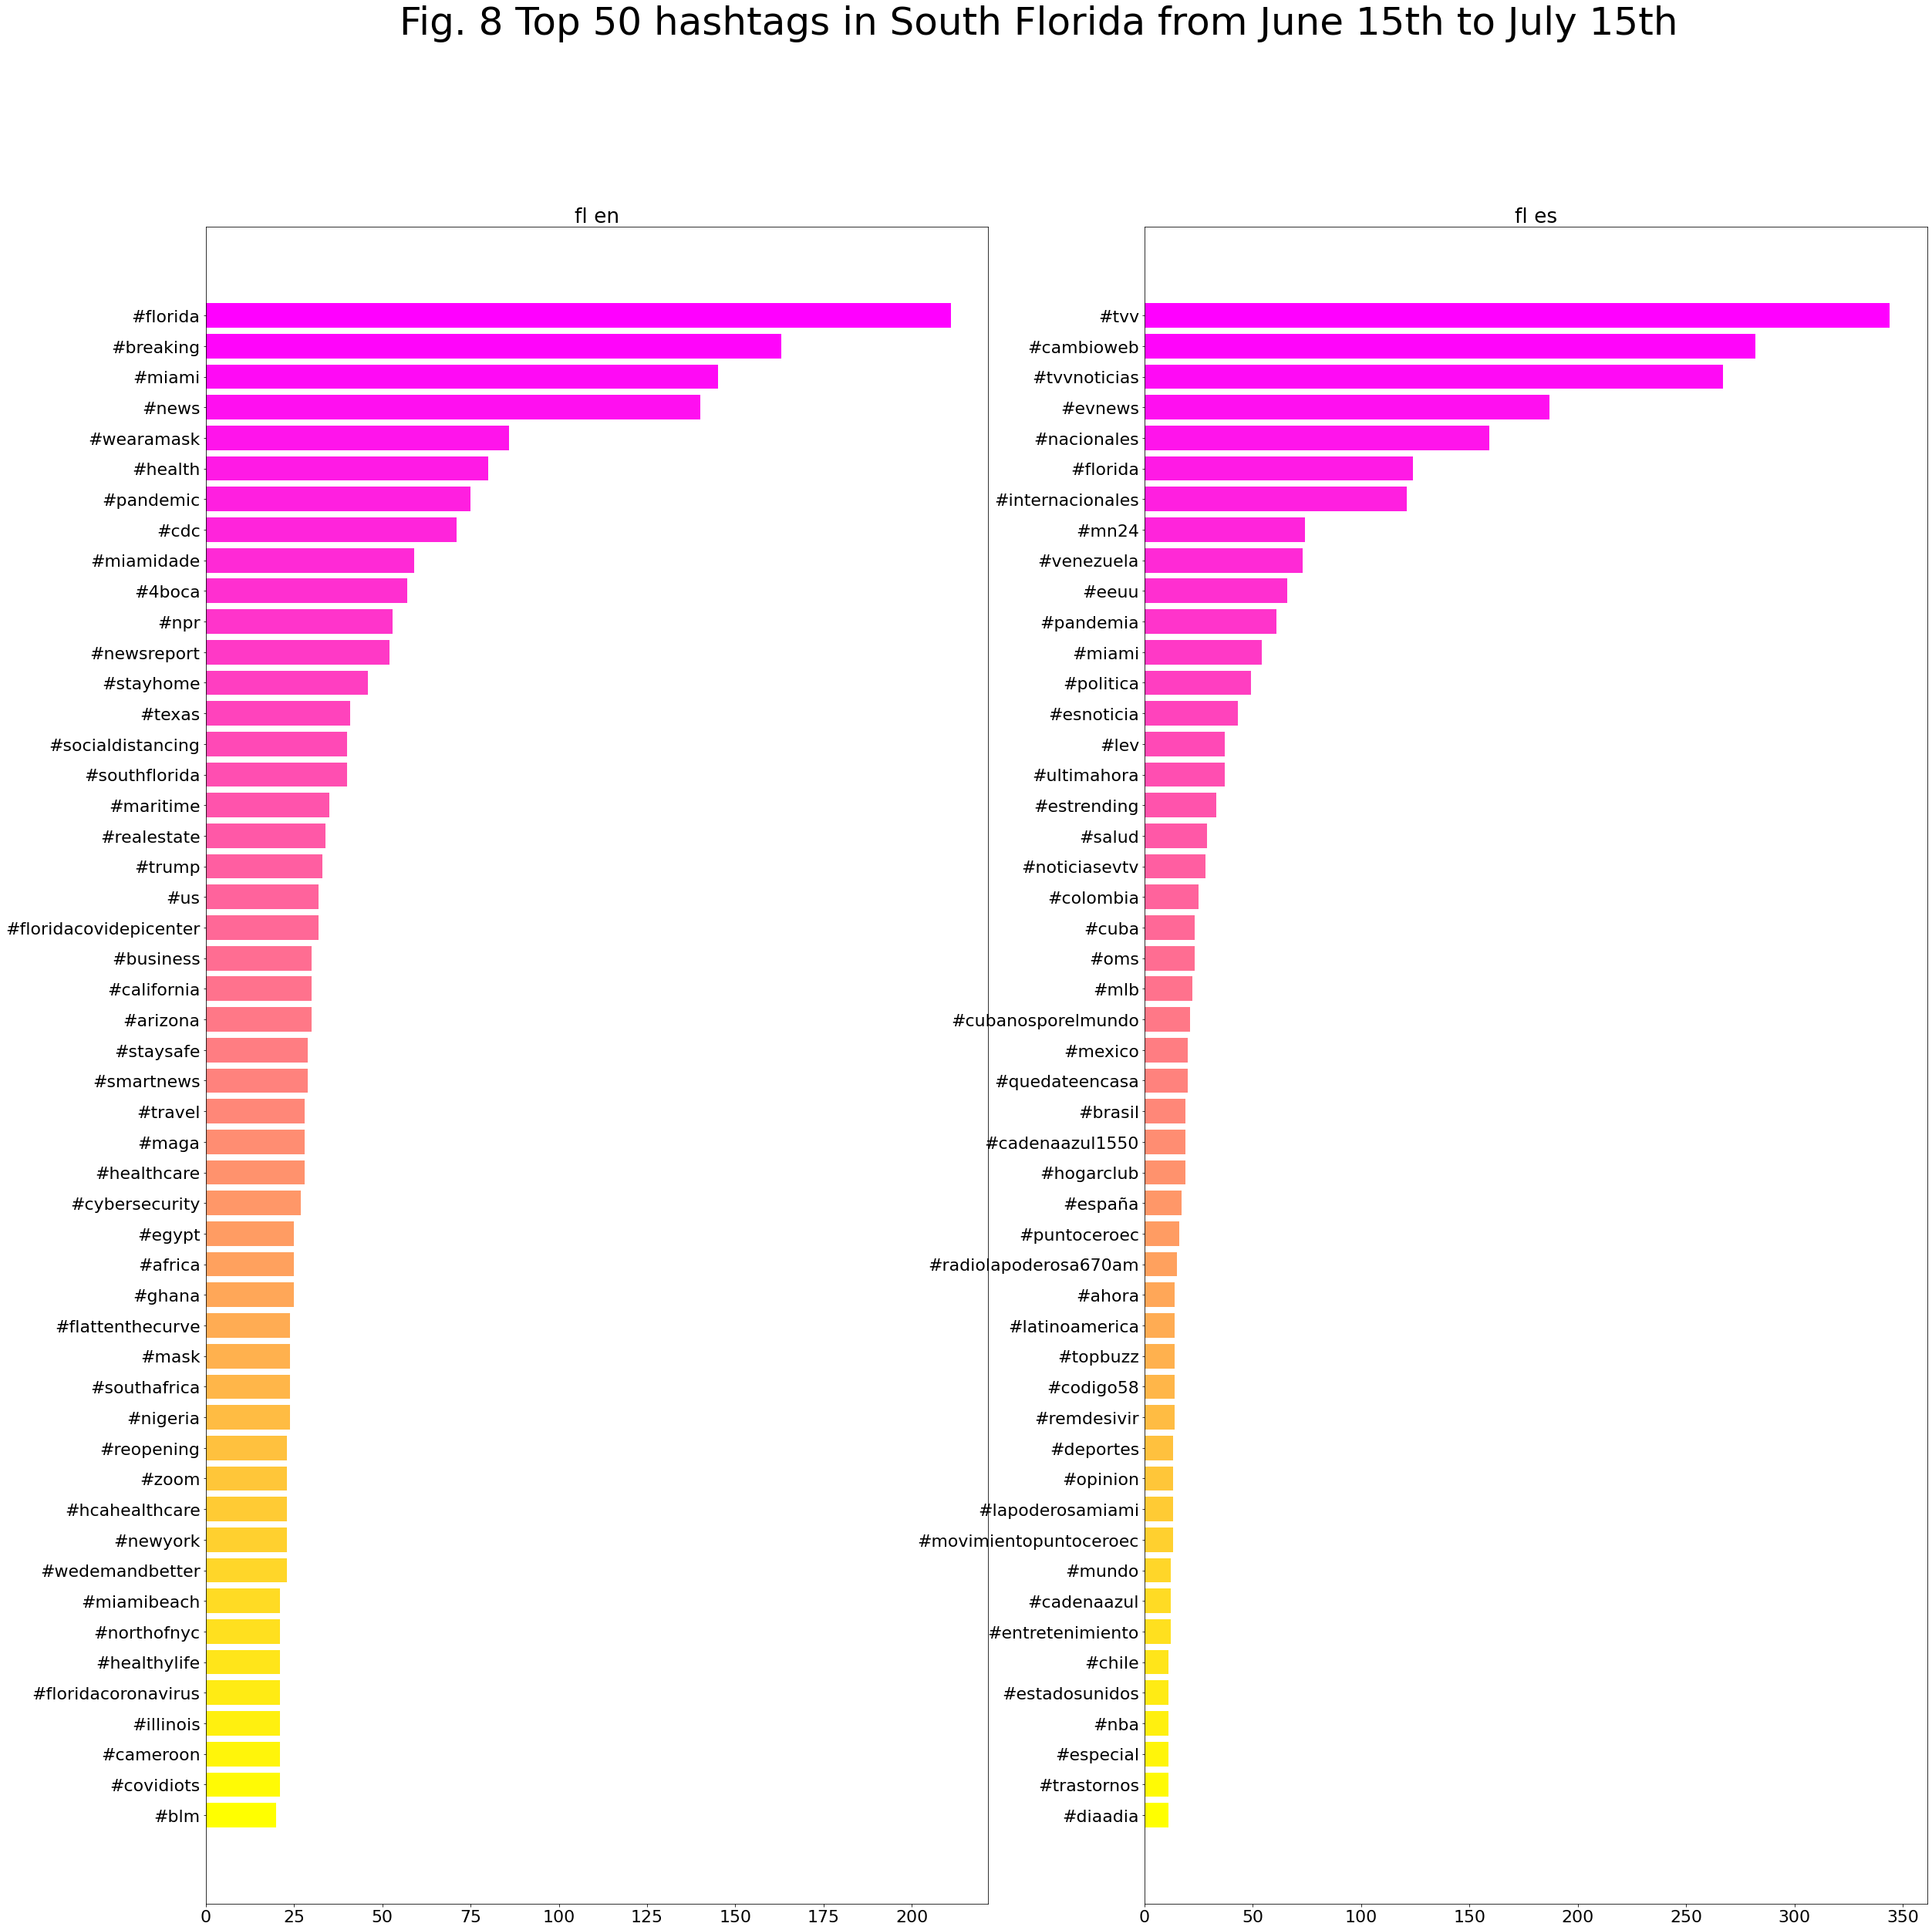

In [207]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2,
               super_title = 'Fig. 8 Top 50 hashtags in South Florida from June 15th to July 15th', super_font = 50)

## Unique hastags  (06/15-07/15)

In [208]:
col_name = "hashtags"
df = df.dropna(subset=[col_name])
grouping = df.groupby(["geo", "lang"])[col_name]
vocab_dic = uniq_vocab_by_group(grouping)  # unique vocab dictionary 
df[col_name] = df.apply(lambda x : set(x[col_name]) & vocab_dic[(x['geo'], x['lang'])],
                        result_type='reduce', axis=1)  # filtering tweets by that dic
counts = {k: Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n) for k, t in grouping}
#pprint(counts)

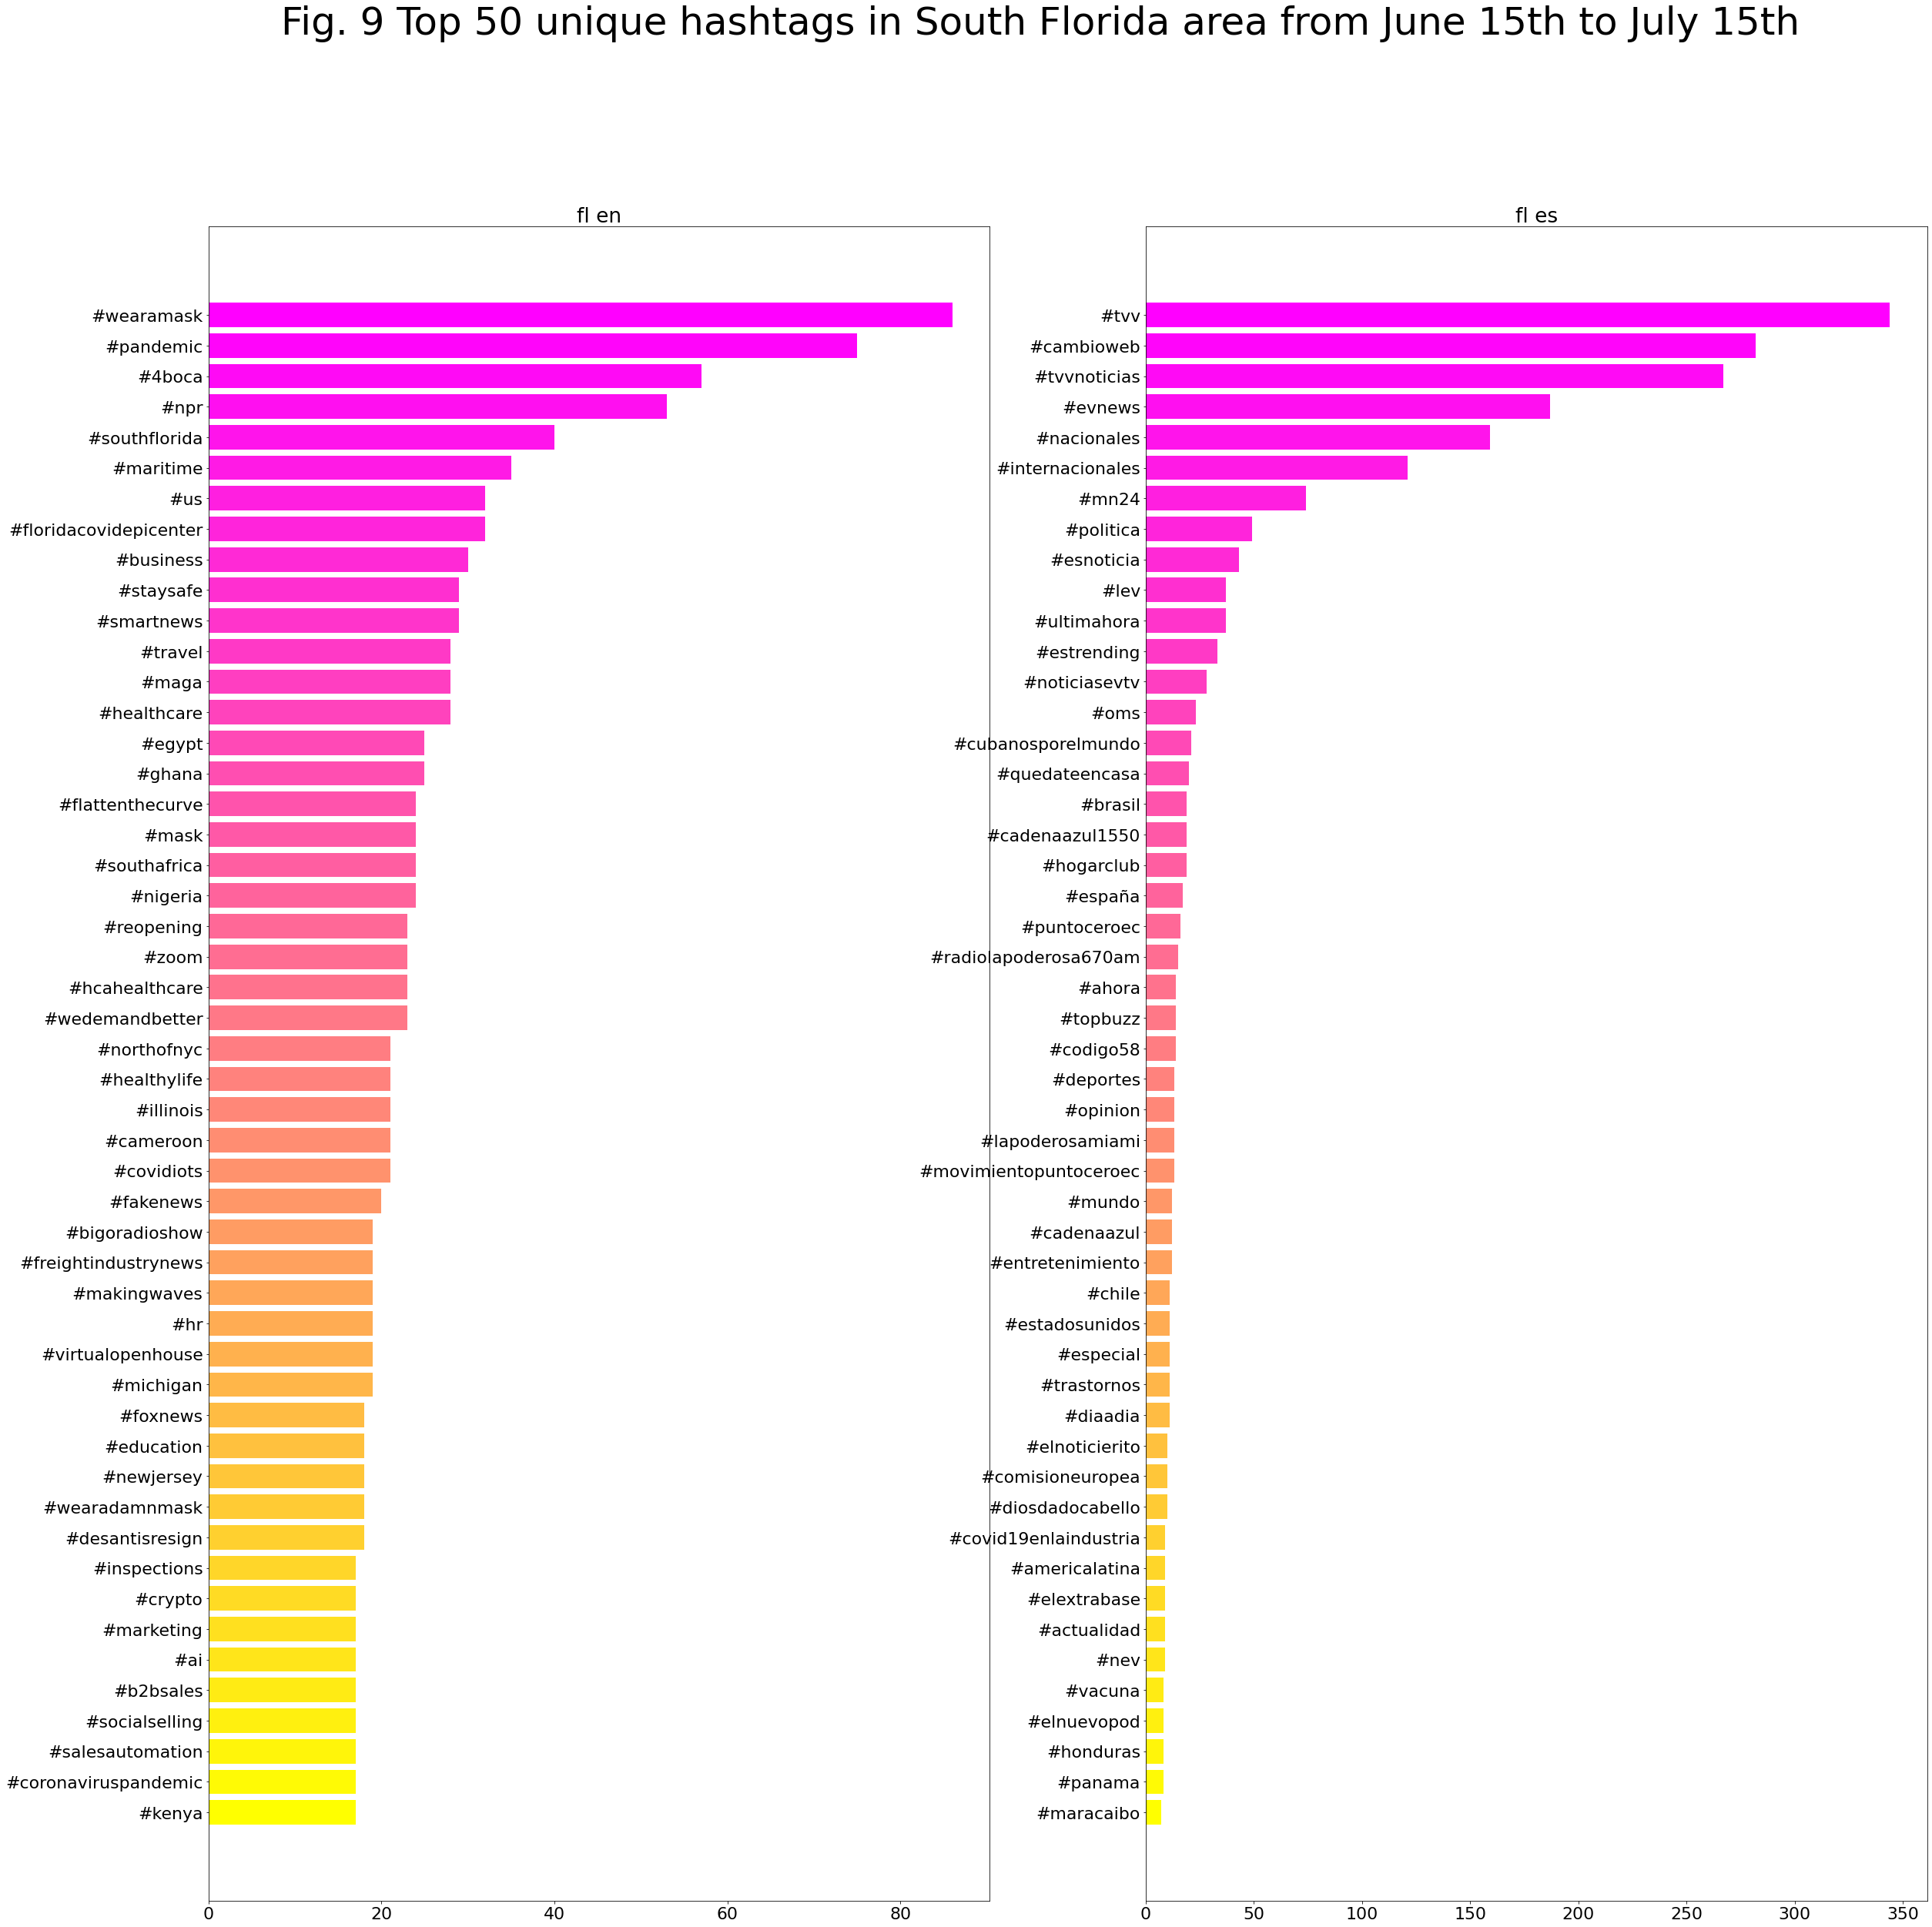

In [209]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2,
               super_title = 'Fig. 9 Top 50 unique hashtags in South Florida area from June 15th to July 15th', super_font = 50)

# July 15th - August 15th 

In [31]:
!python3 coveet.py query -g fl -l en es -d 2020-07-15 2020-08-15

Namespace(all=False, date=[datetime.datetime(2020, 7, 15, 0, 0), datetime.datetime(2020, 8, 15, 0, 0)], func=<function handle_query at 0x7f5338171550>, geo=['fl'], lang=['en', 'es'], search=None)
wrote df to dhcovid_2020-7-15_2020-8-15_en_es_fl.csv 🎉


In [210]:
df = pd.read_csv('dhcovid_2020-7-15_2020-8-15_en_es_fl.csv', index_col=0)

In [211]:
!python3 coveet.py tidy -file dhcovid_2020-7-15_2020-8-15_en_es_fl.csv -stopwords ../stopwords/stopwords_es.txt ../stopwords/stopwords_en.txt ../stopwords/stopwords_hashtags.txt

Namespace(file='dhcovid_2020-7-15_2020-8-15_en_es_fl.csv', func=<function handle_tidy at 0x7f1eccc60670>, lemmatize=False, search=None, stopwords=['../stopwords/stopwords_es.txt', '../stopwords/stopwords_en.txt', '../stopwords/stopwords_hashtags.txt'])
wrote tidied df to dhcovid_2020-7-15_2020-8-15_en_es_fl_stopworded.csv 🎉


## Top 100 words (07/15-08/15)

In [212]:
df = pd.read_csv('dhcovid_2020-7-15_2020-8-15_en_es_fl_stopworded.csv', index_col=0) # run from here using this file
df['date'] = pd.to_datetime(df['date'])
df['text'] = df['text'].str.split()
df['hashtags'] = df['hashtags'].str.split()
top_n = 100  # top 10 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'text'  # set to either 'text' or 'hashtags'
df_text = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df_text.groupby(["geo", "lang"])[col_name]}
#pprint(counts)

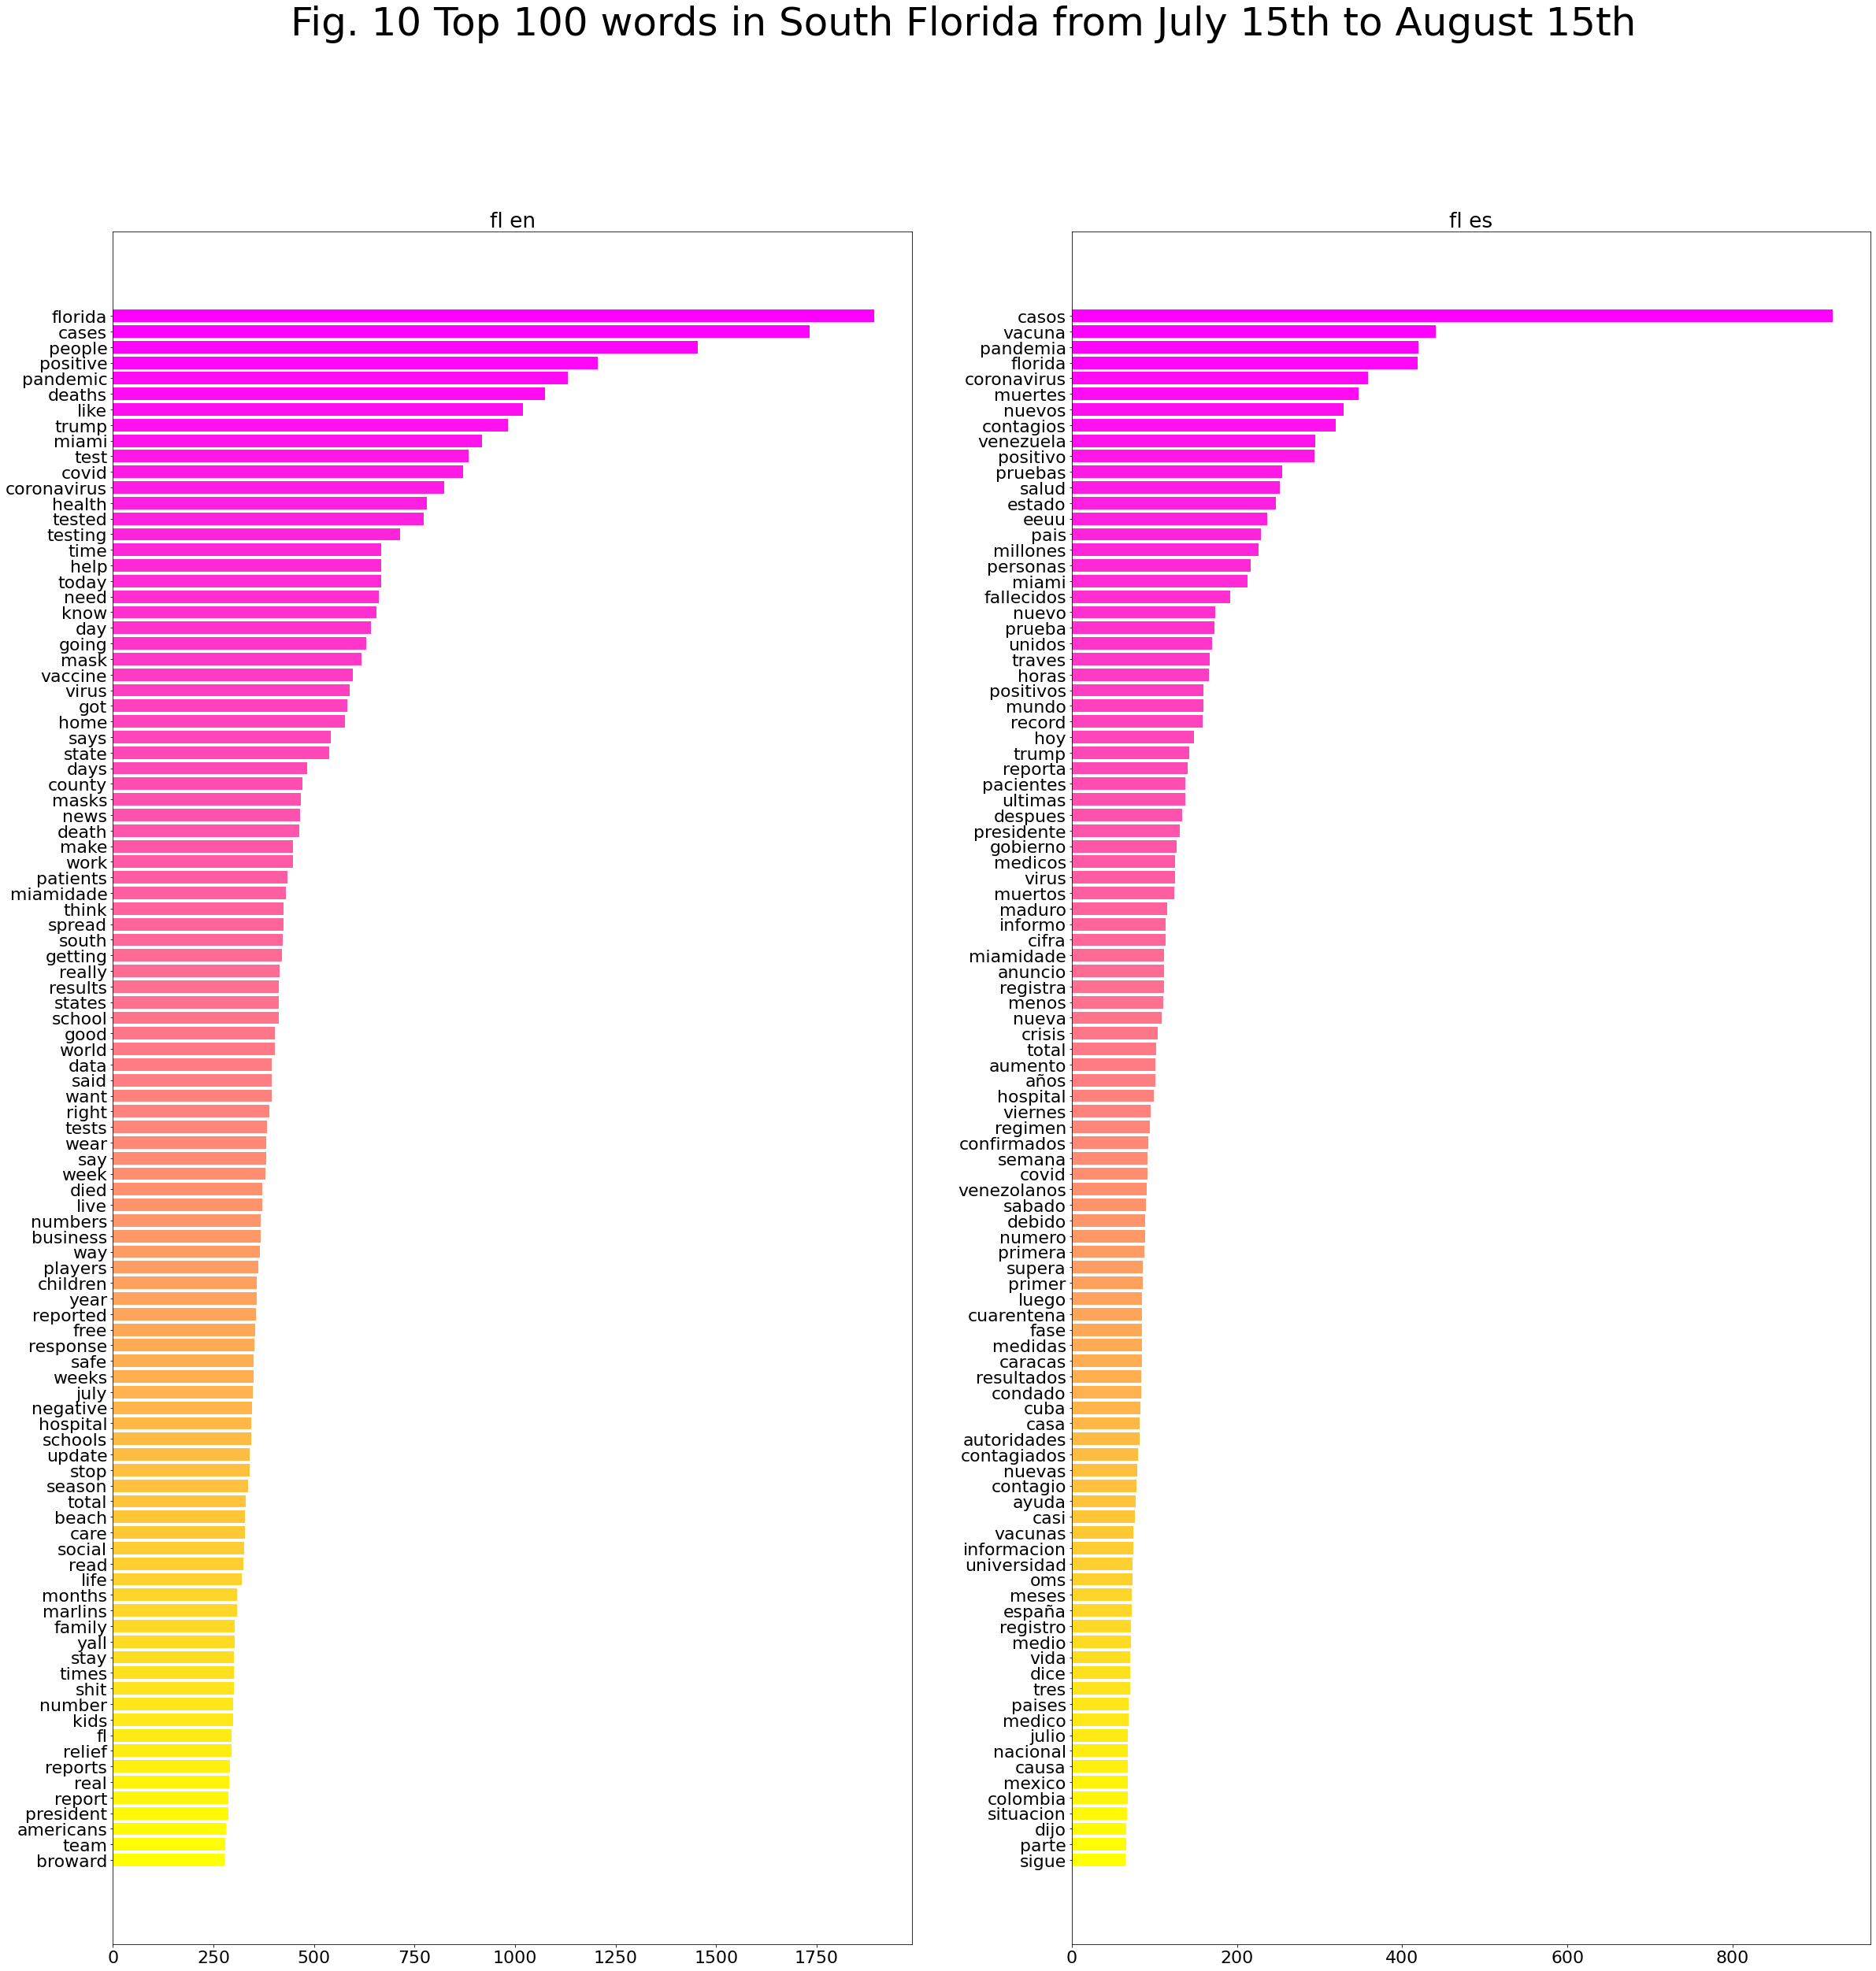

In [213]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2,
               super_title = 'Fig. 10 Top 100 words in South Florida from July 15th to August 15th', super_font = 50)

## Top 50 hashtags (07/15-08/15)

In [214]:
top_n = 50  # top 50 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'hashtags'  # set to either 'text' or 'hashtags'
df_text = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df_text.groupby(["geo", "lang"])[col_name]}
#pprint(counts)

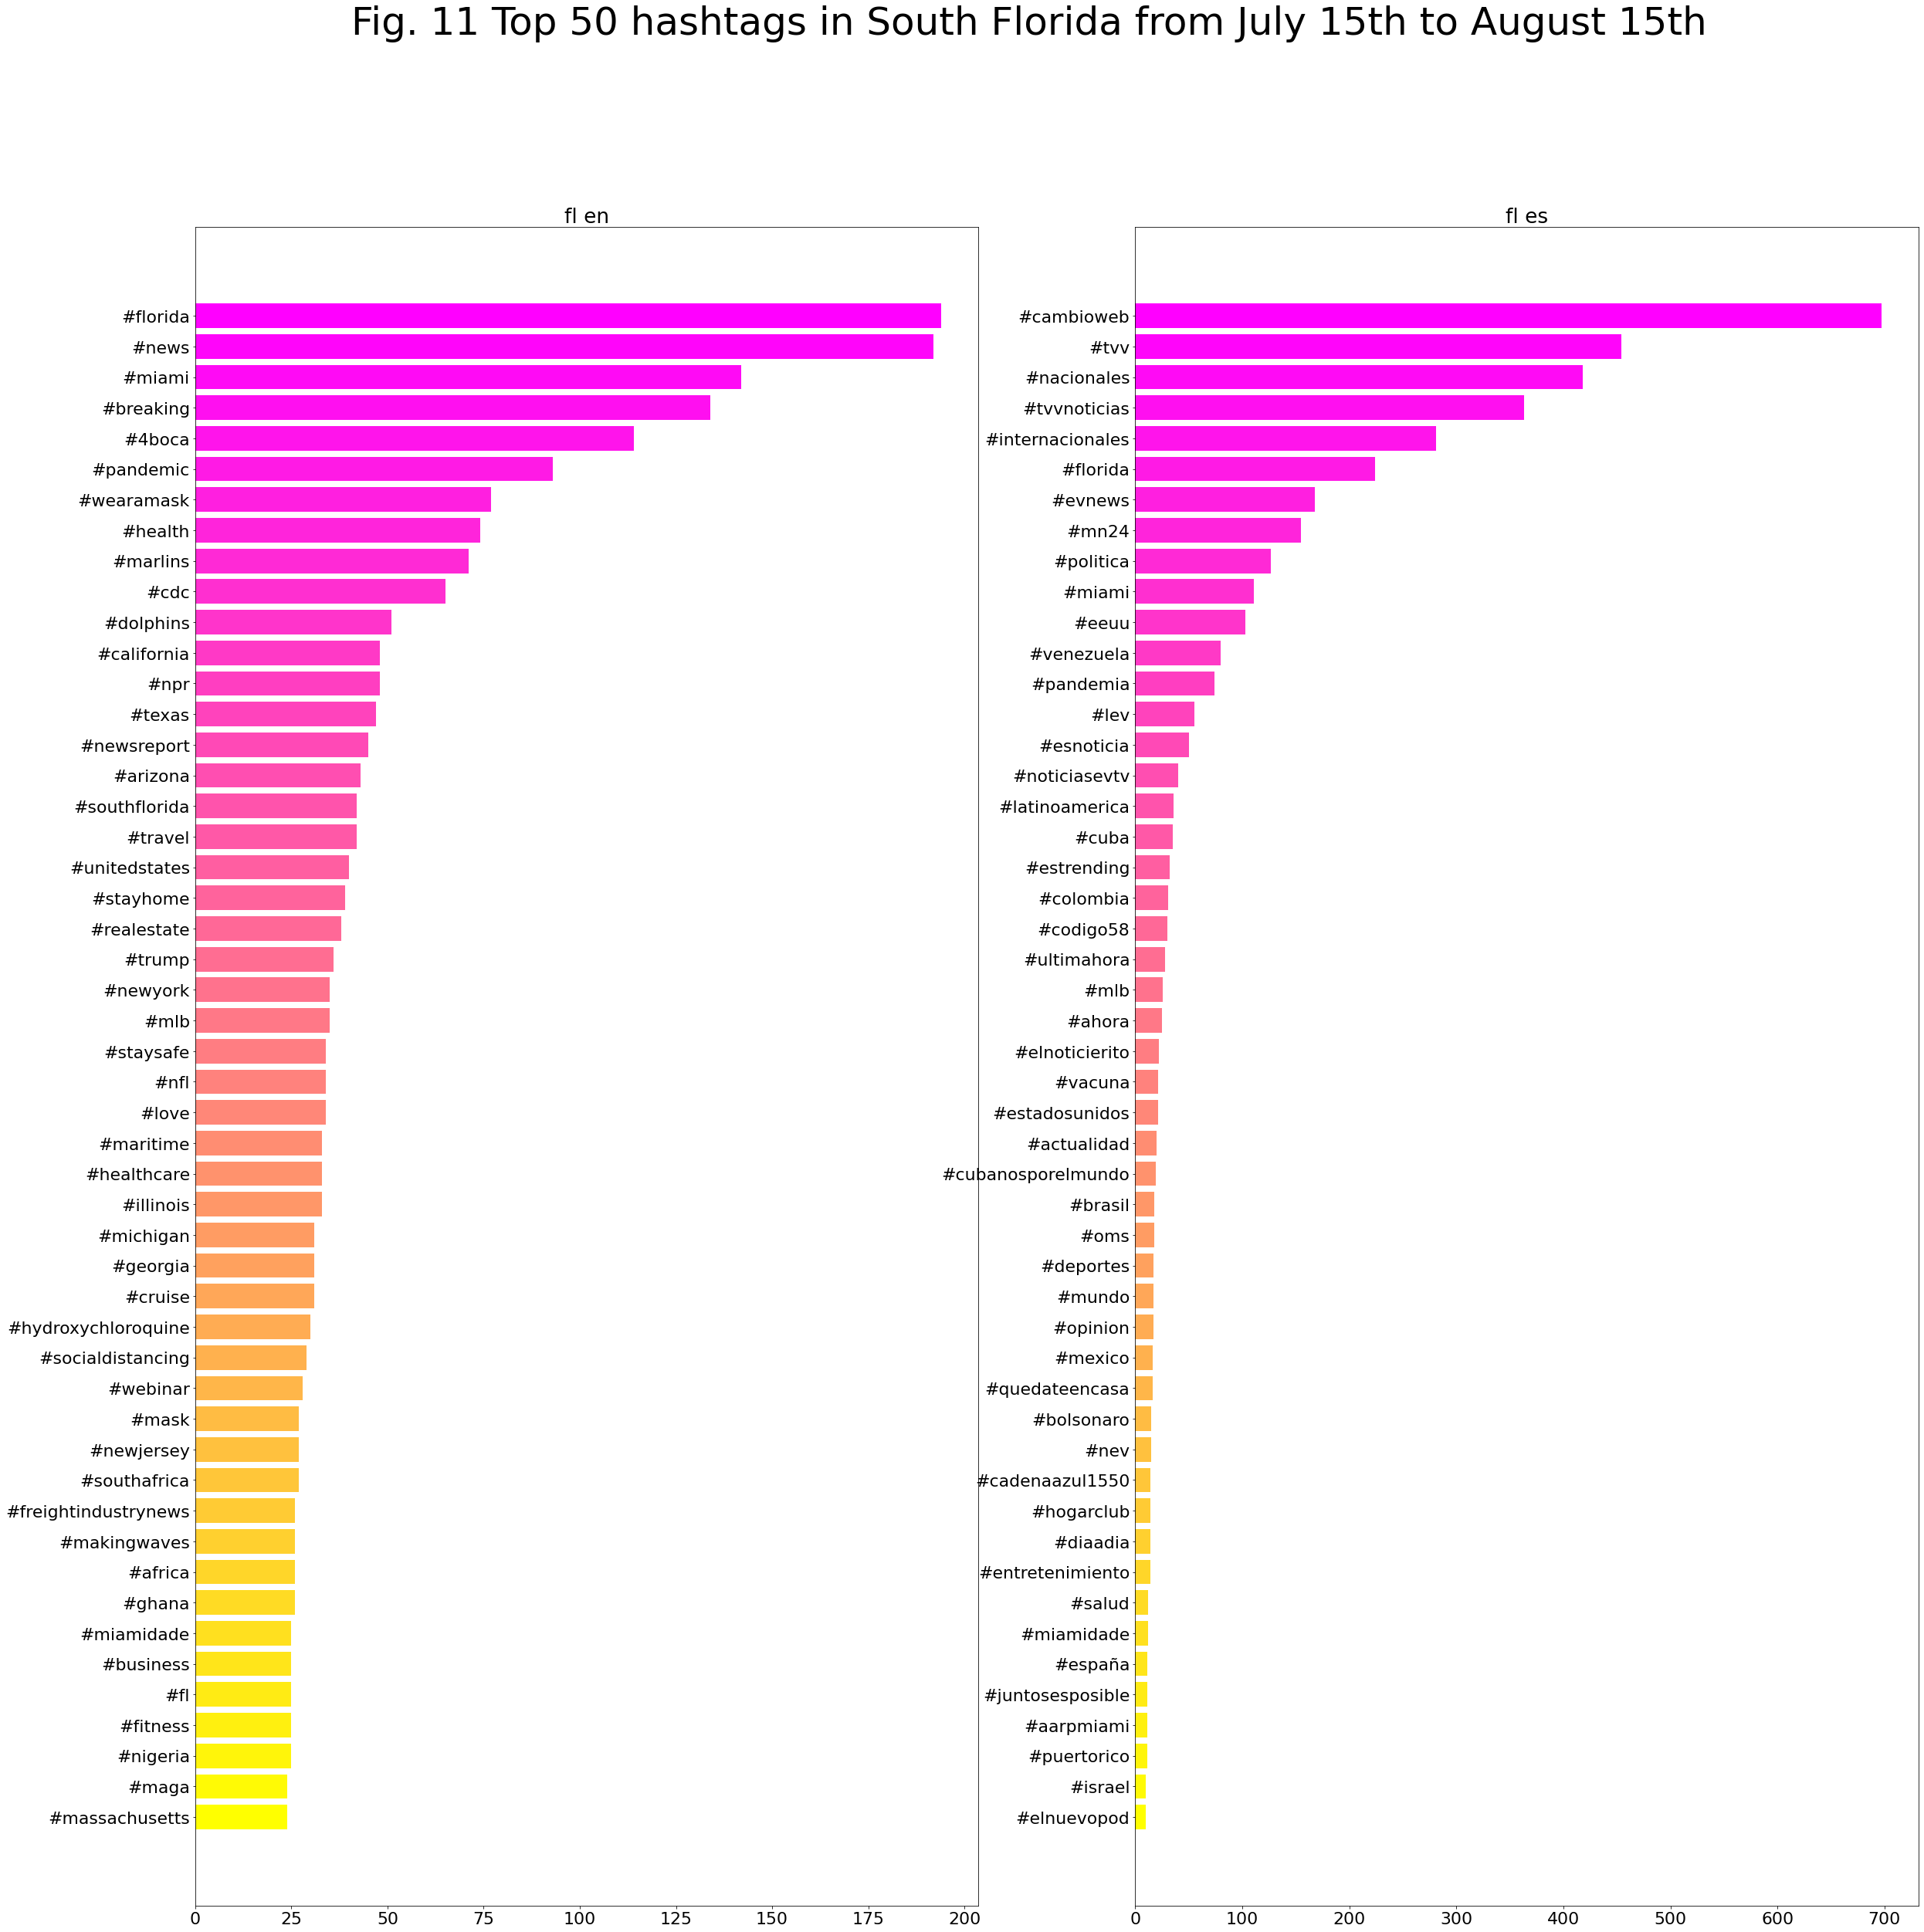

In [215]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2,
               super_title = 'Fig. 11 Top 50 hashtags in South Florida from July 15th to August 15th', super_font = 50)

## Unique 50 hastags (07/15-08/15)

In [216]:
col_name = "hashtags"
df = df.dropna(subset=[col_name])
grouping = df.groupby(["geo", "lang"])[col_name]
vocab_dic = uniq_vocab_by_group(grouping)  # unique vocab dictionary 
df[col_name] = df.apply(lambda x : set(x[col_name]) & vocab_dic[(x['geo'], x['lang'])],
                        result_type='reduce', axis=1)  # filtering tweets by that dic
counts = {k: Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n) for k, t in grouping}
#pprint(counts)

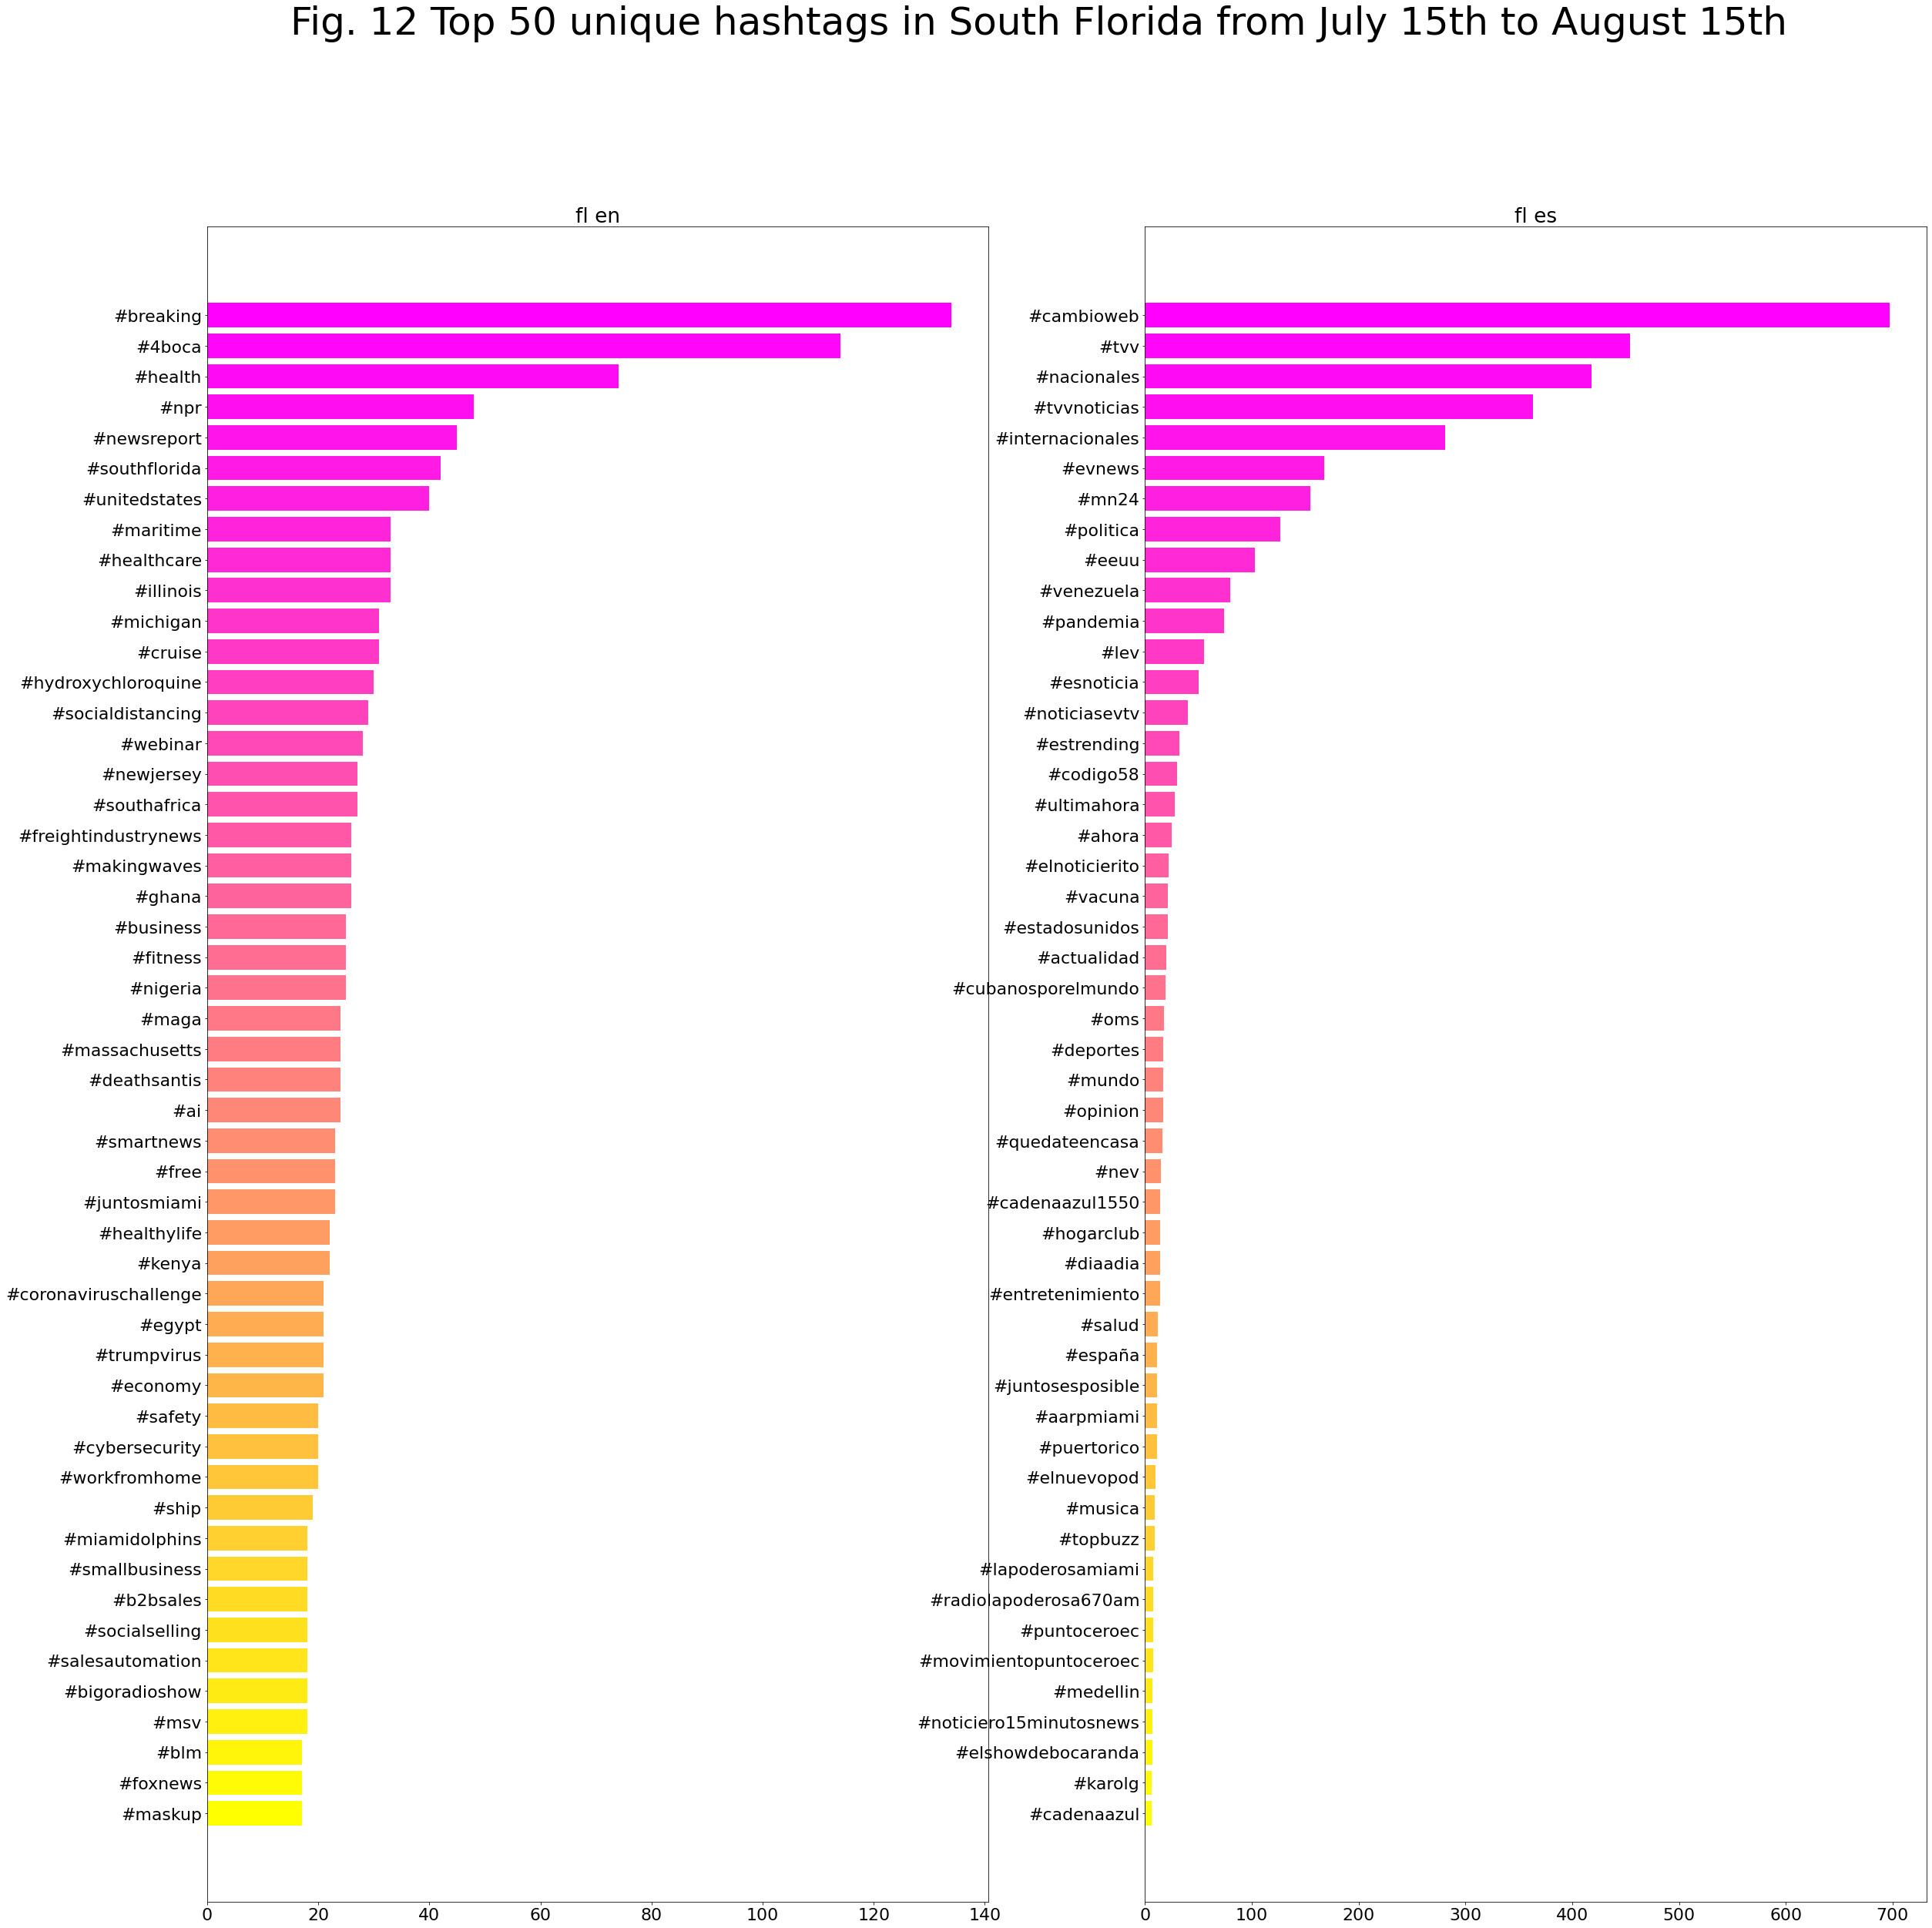

In [217]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2,
               super_title = 'Fig. 12 Top 50 unique hashtags in South Florida from July 15th to August 15th', super_font = 50)

# August 15th - September 15th 

In [40]:
!python3 coveet.py query -g fl -l en es -d 2020-08-15 2020-09-15

Namespace(all=False, date=[datetime.datetime(2020, 8, 15, 0, 0), datetime.datetime(2020, 9, 15, 0, 0)], func=<function handle_query at 0x7f581de4e550>, geo=['fl'], lang=['en', 'es'], search=None)
wrote df to dhcovid_2020-8-15_2020-9-15_en_es_fl.csv 🎉


In [226]:
df = pd.read_csv('dhcovid_2020-8-15_2020-9-15_en_es_fl.csv', index_col=0)

In [227]:
!python3 coveet.py tidy -file dhcovid_2020-8-15_2020-9-15_en_es_fl.csv -stopwords ../stopwords/stopwords_en.txt ../stopwords/stopwords_es.txt ../stopwords/stopwords_hashtags.txt

Namespace(file='dhcovid_2020-8-15_2020-9-15_en_es_fl.csv', func=<function handle_tidy at 0x7ff1524cc670>, lemmatize=False, search=None, stopwords=['../stopwords/stopwords_en.txt', '../stopwords/stopwords_es.txt', '../stopwords/stopwords_hashtags.txt'])
wrote tidied df to dhcovid_2020-8-15_2020-9-15_en_es_fl_stopworded.csv 🎉


## Top 100 words (08/15-09/15)

In [228]:
df = pd.read_csv('dhcovid_2020-8-15_2020-9-15_en_es_fl_stopworded.csv', index_col=0) # run from here using this file
df['date'] = pd.to_datetime(df['date'])
df['text'] = df['text'].str.split()
df['hashtags'] = df['hashtags'].str.split()
top_n = 100  # top 100 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'text'  # set to either 'text' or 'hashtags'
df = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df.groupby(["geo", "lang"])[col_name]}
#pprint(counts)

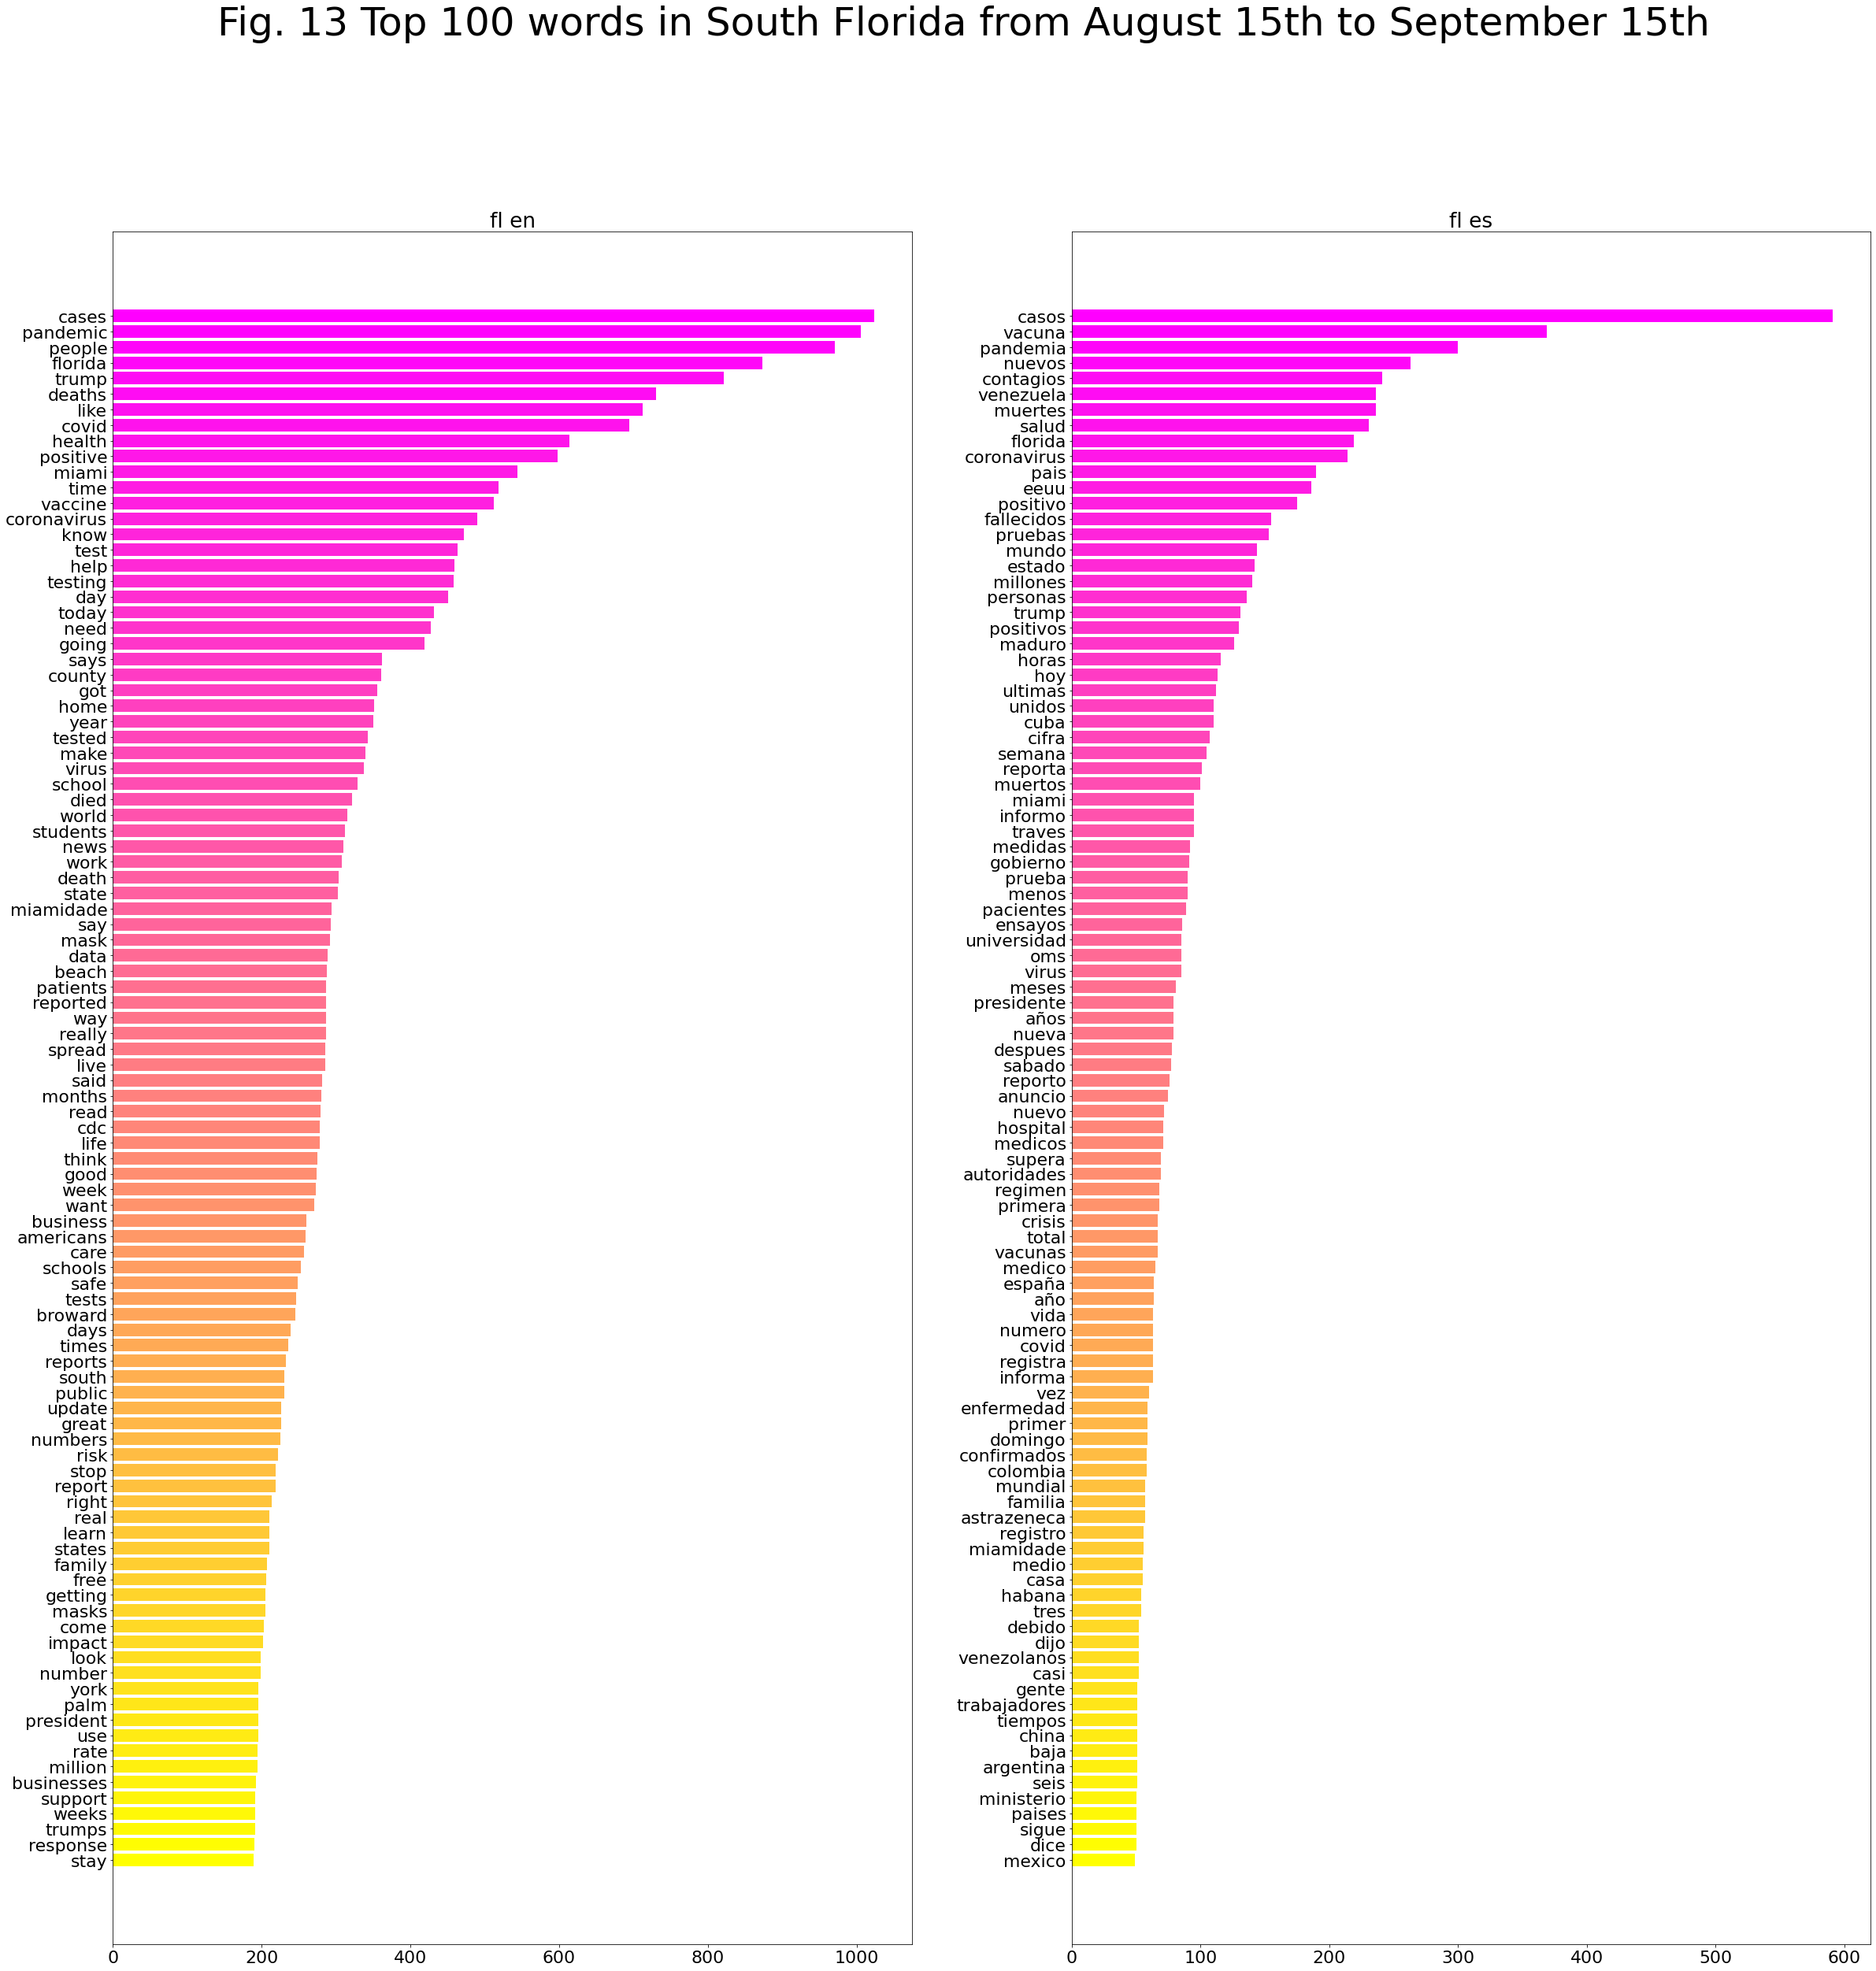

In [229]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2,
               super_title = 'Fig. 13 Top 100 words in South Florida from August 15th to September 15th', super_font = 50)

## Top 50 hashtags (08/15-09/15)

In [230]:
top_n = 50  # top 50 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'hashtags'  # set to either 'text' or 'hashtags'
df_text = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df_text.groupby(["geo", "lang"])[col_name]}
#pprint(counts)

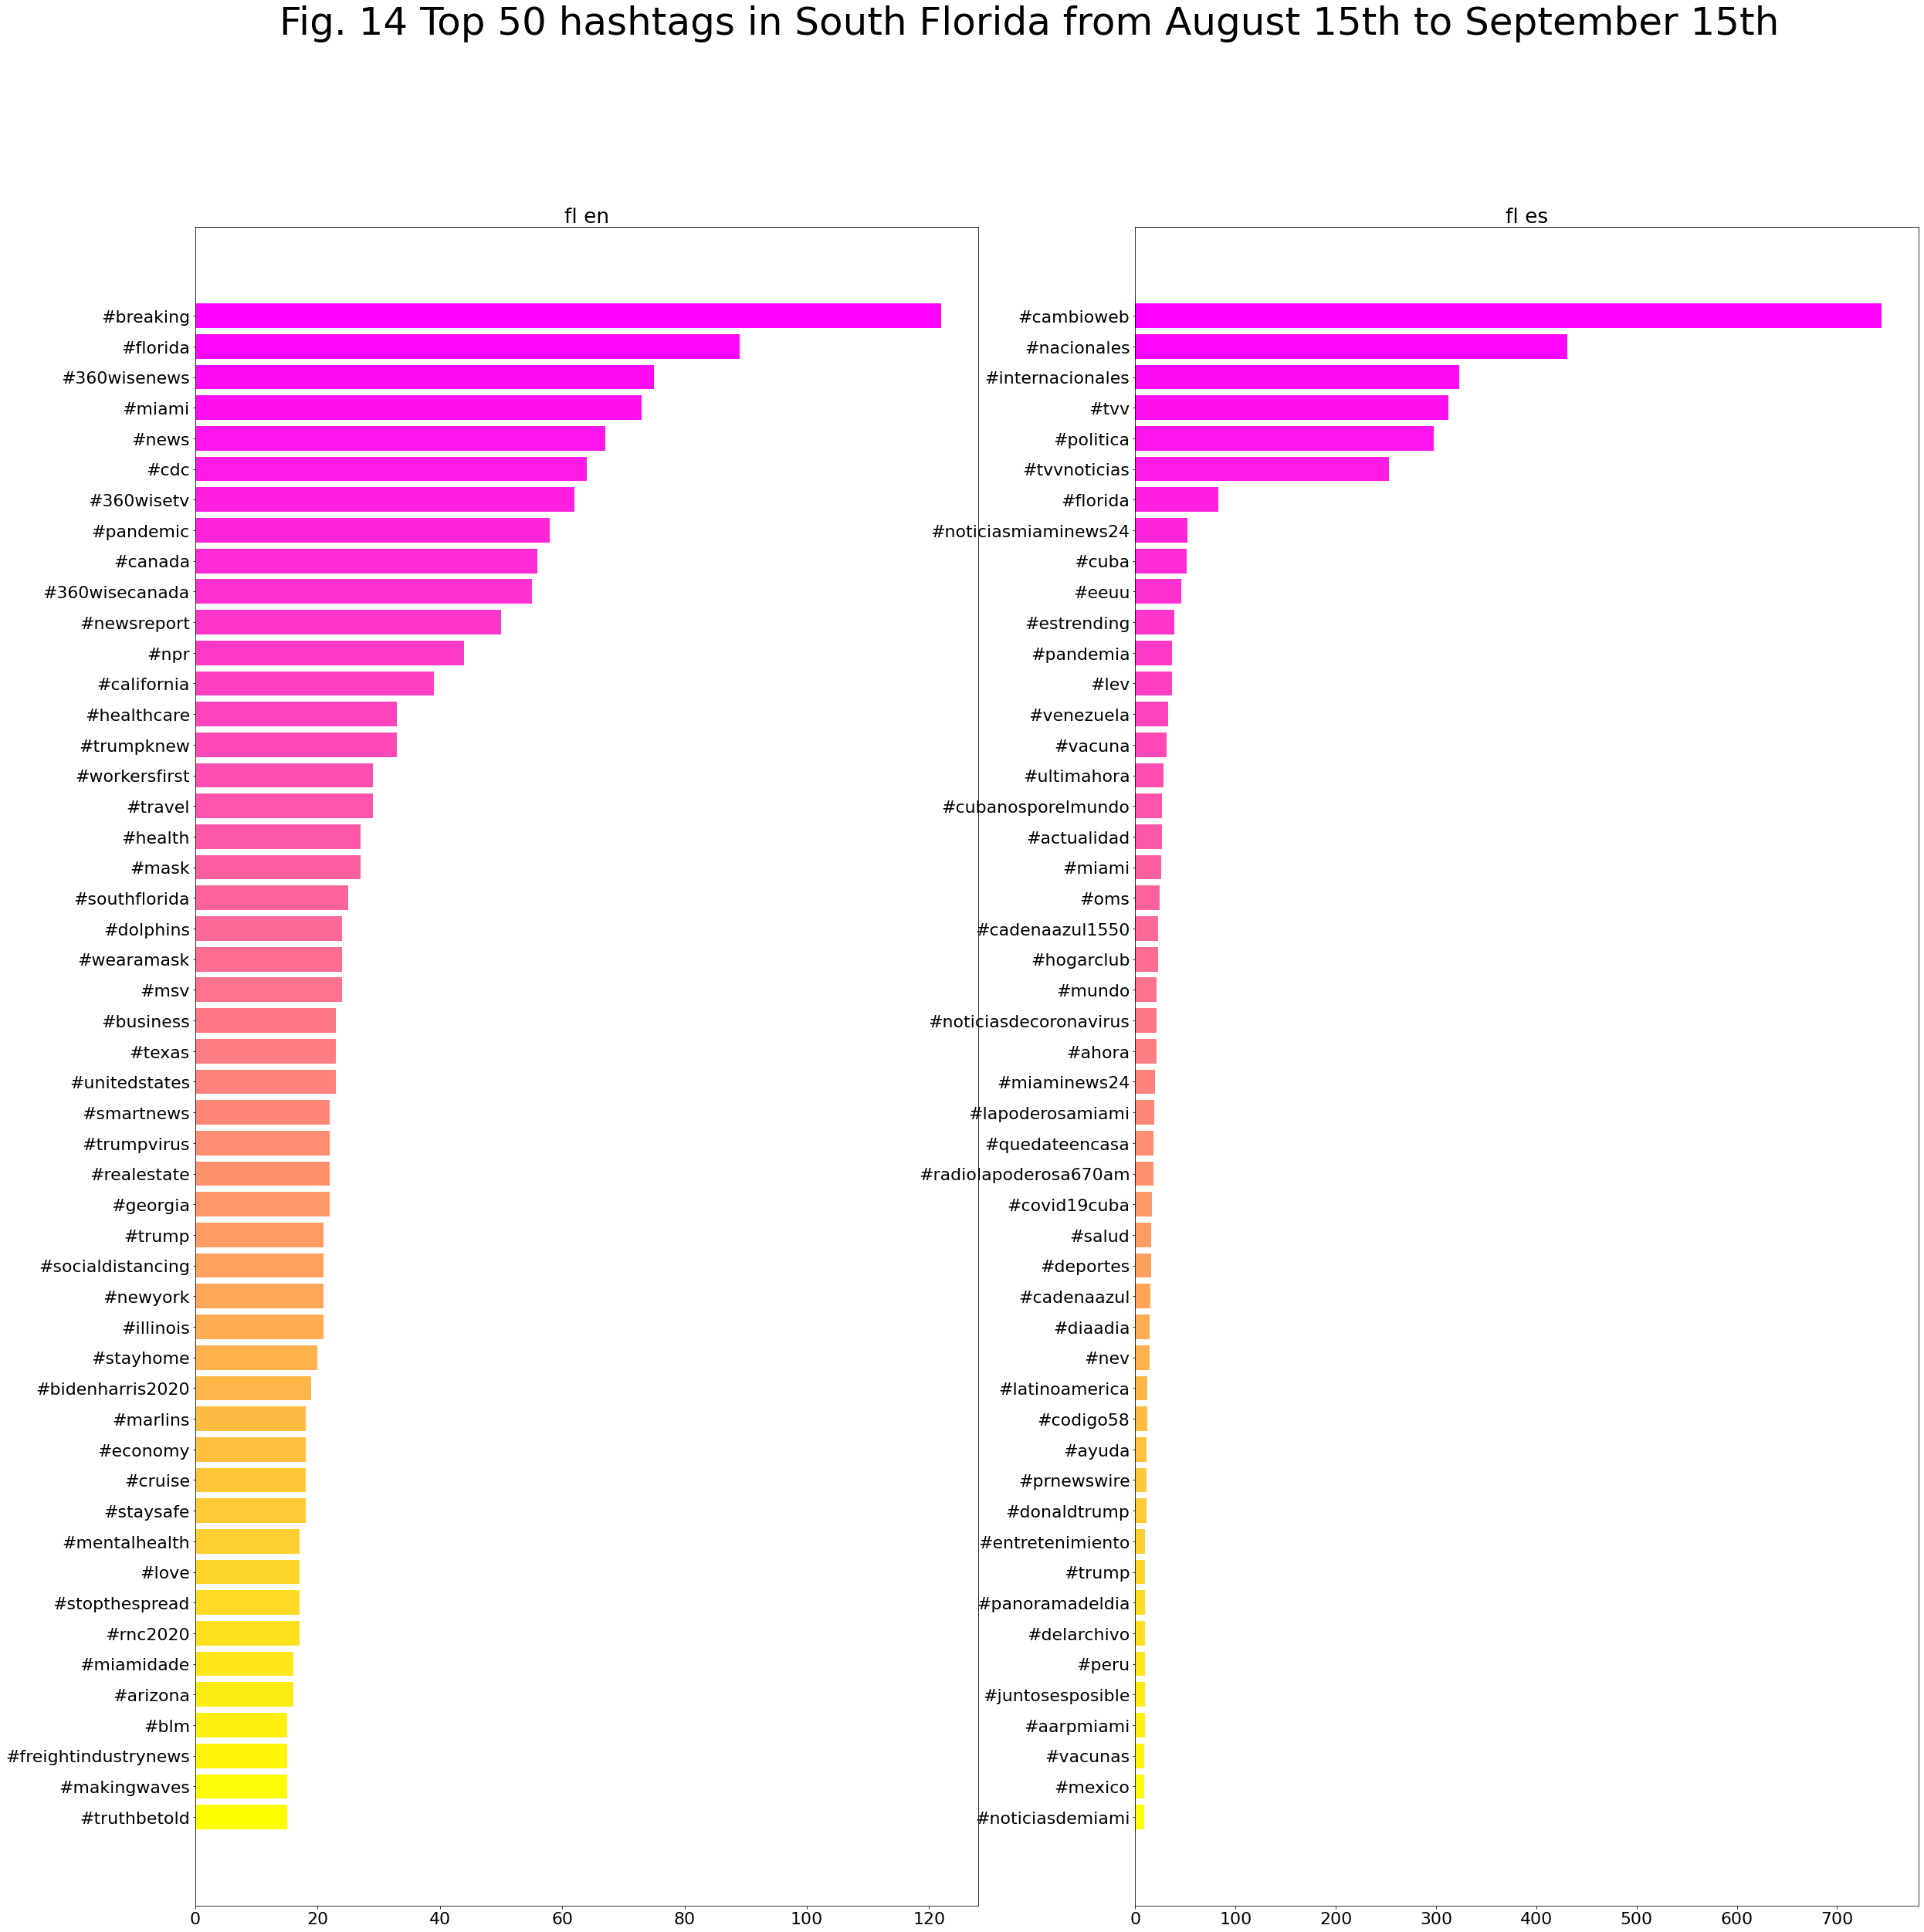

In [231]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2,
               super_title = 'Fig. 14 Top 50 hashtags in South Florida from August 15th to September 15th', super_font = 50)

## Unique 50 hashtags (08/15-09/15)

In [232]:
col_name = "hashtags"
df = df.dropna(subset=[col_name])
grouping = df.groupby(["geo", "lang"])[col_name]
vocab_dic = uniq_vocab_by_group(grouping)  # unique vocab dictionary 
df[col_name] = df.apply(lambda x : set(x[col_name]) & vocab_dic[(x['geo'], x['lang'])],
                        result_type='reduce', axis=1)  # filtering tweets by that dic
counts = {k: Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n) for k, t in grouping}
#pprint(counts)

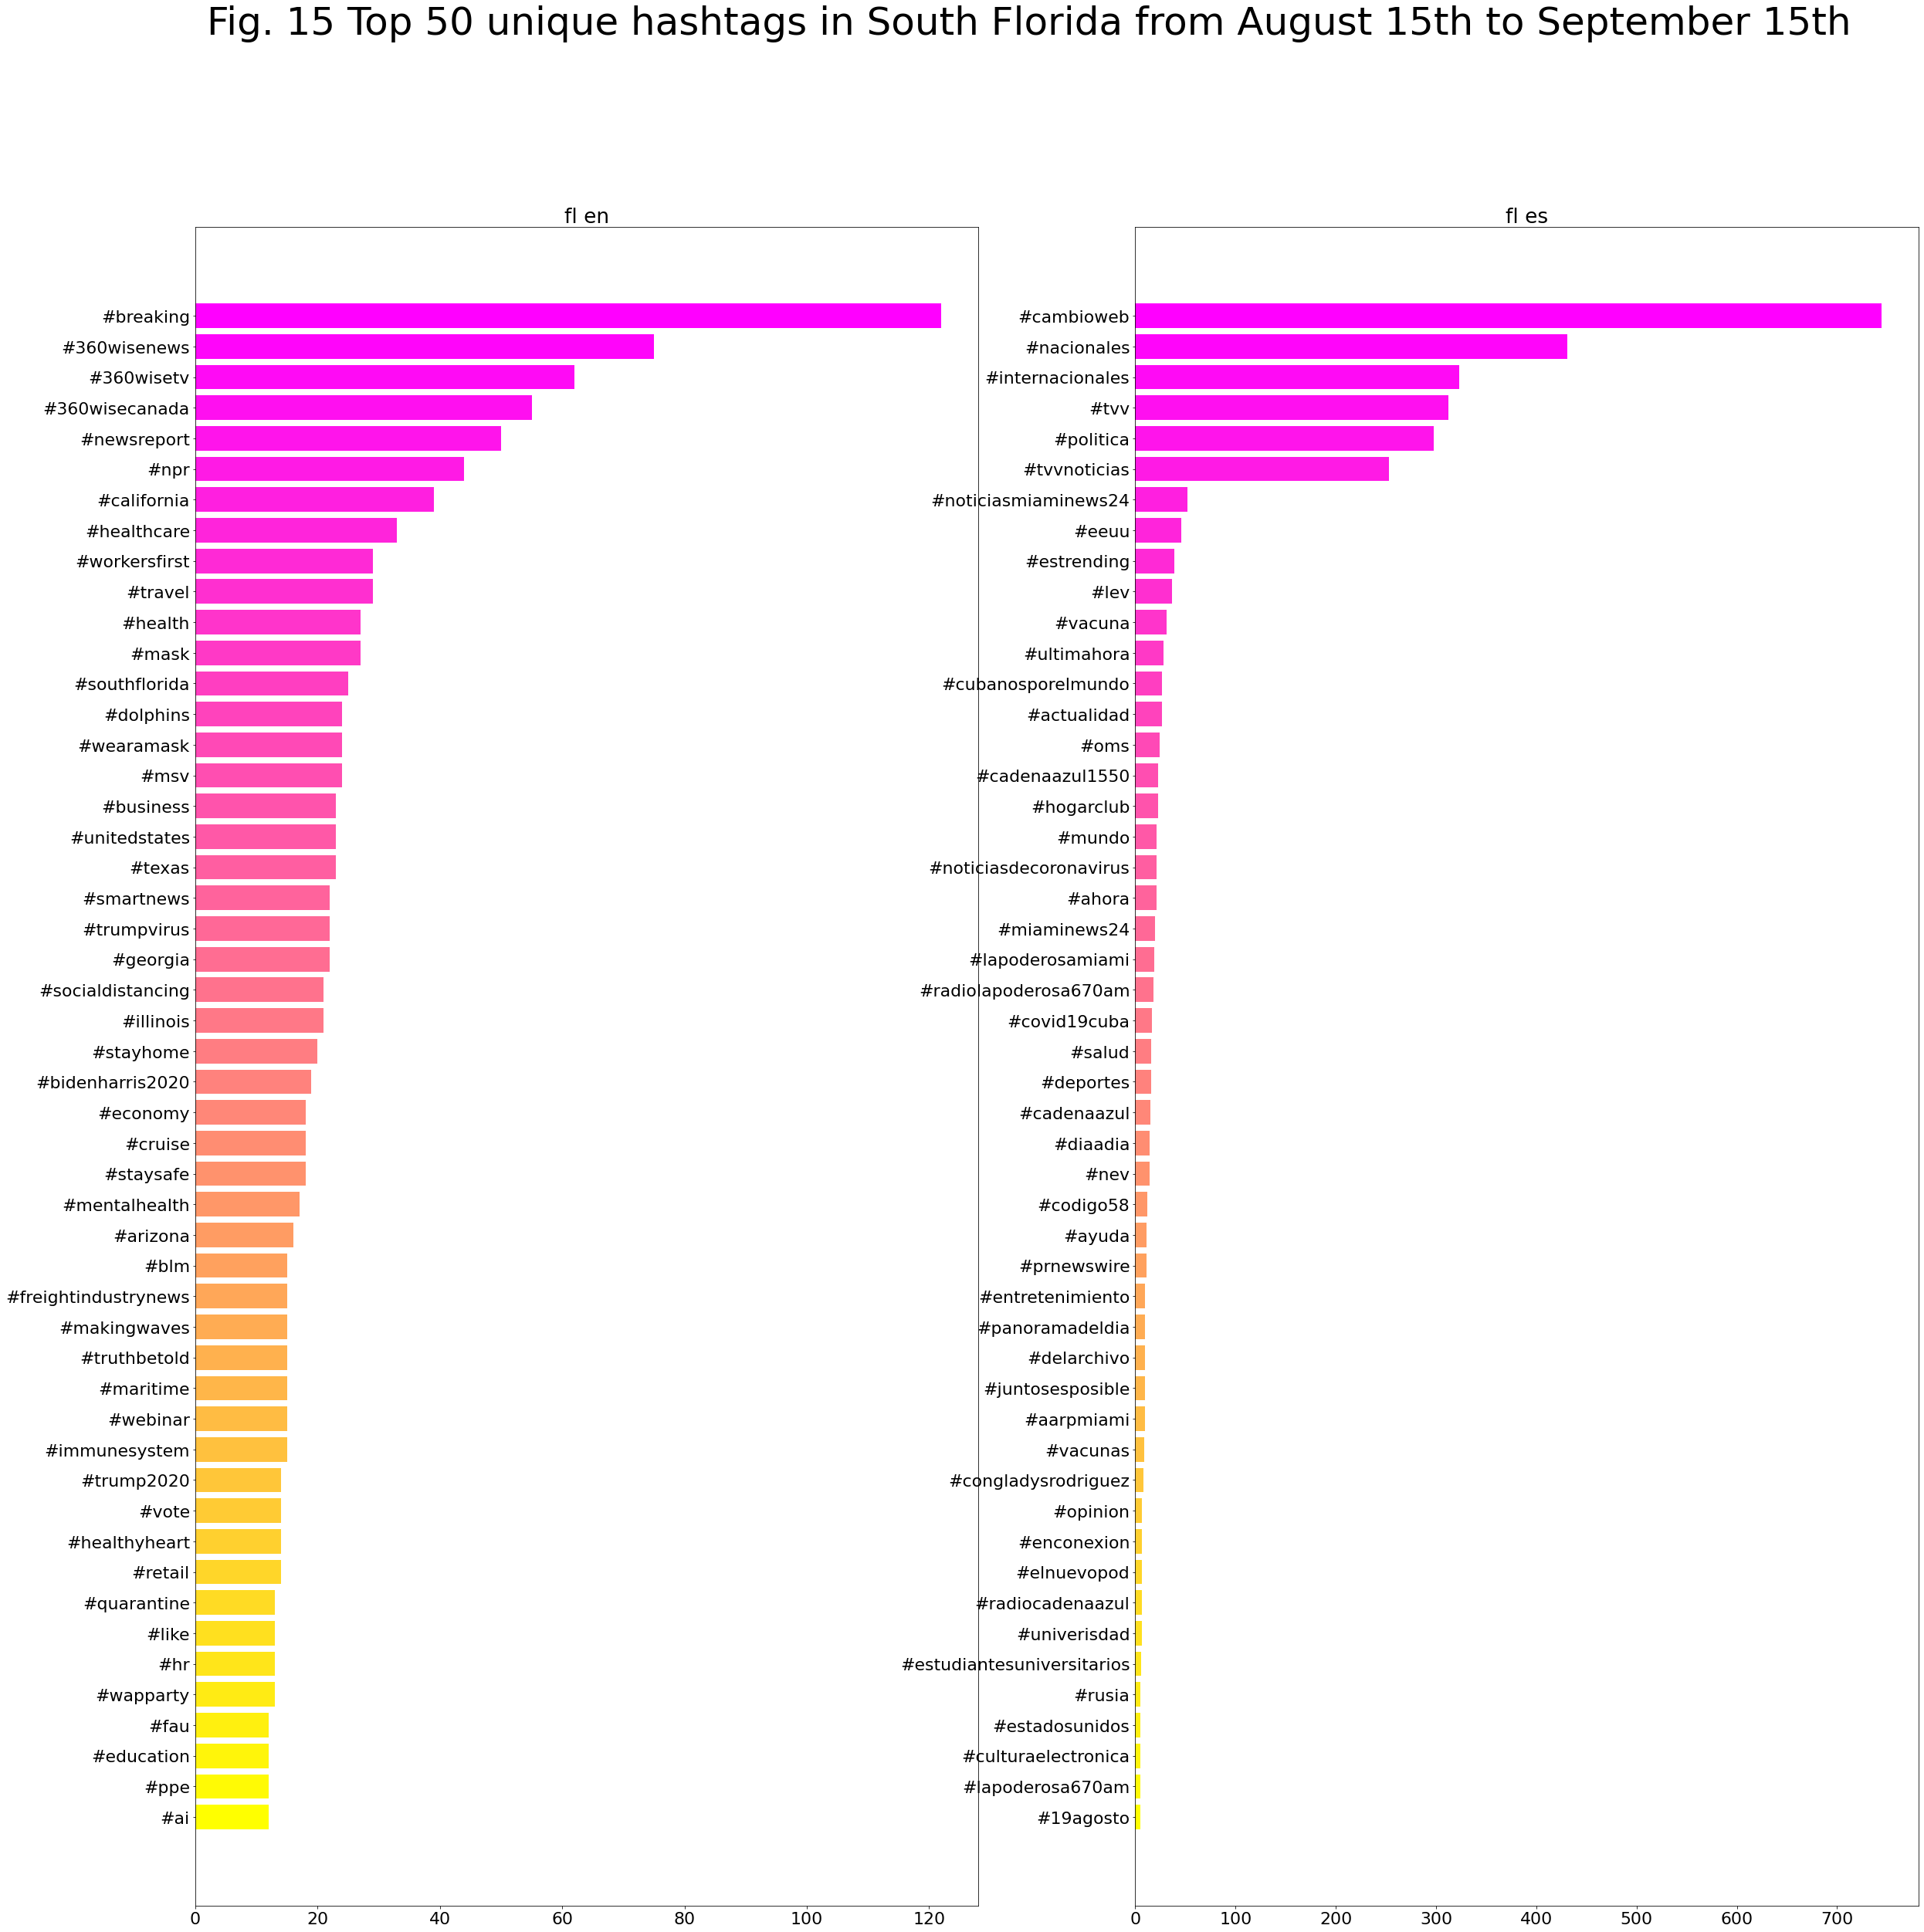

In [233]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2,
               super_title = 'Fig. 15 Top 50 unique hashtags in South Florida from August 15th to September 15th', super_font = 50)
